In [558]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score,roc_curve, precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import chi2_contingency

In [301]:
loantap = pd.read_csv("logistic_regression.csv")

In [302]:
lt = loantap.copy()

In [303]:
lt.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [304]:
#info of dataset
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [305]:
lt.shape

(396030, 27)

In [306]:
lt.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [307]:
#columns datatpes
lt.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [308]:
#checking null values
lt.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [309]:
# target column
lt["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [310]:
#target values detail description
lt.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<Axes: xlabel='loan_status', ylabel='count'>

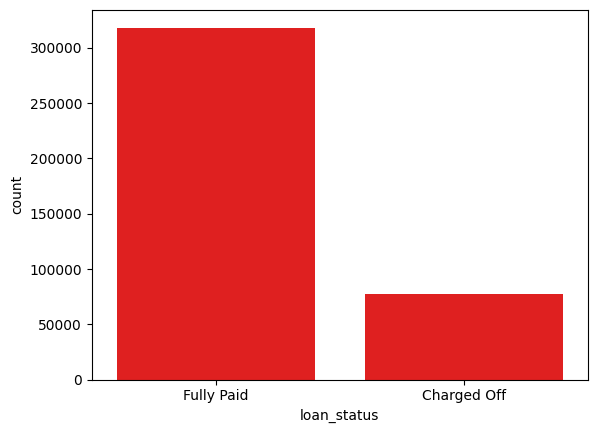

In [311]:
#visualization of target column
sns.countplot(data = lt, x= "loan_status", color = "r")

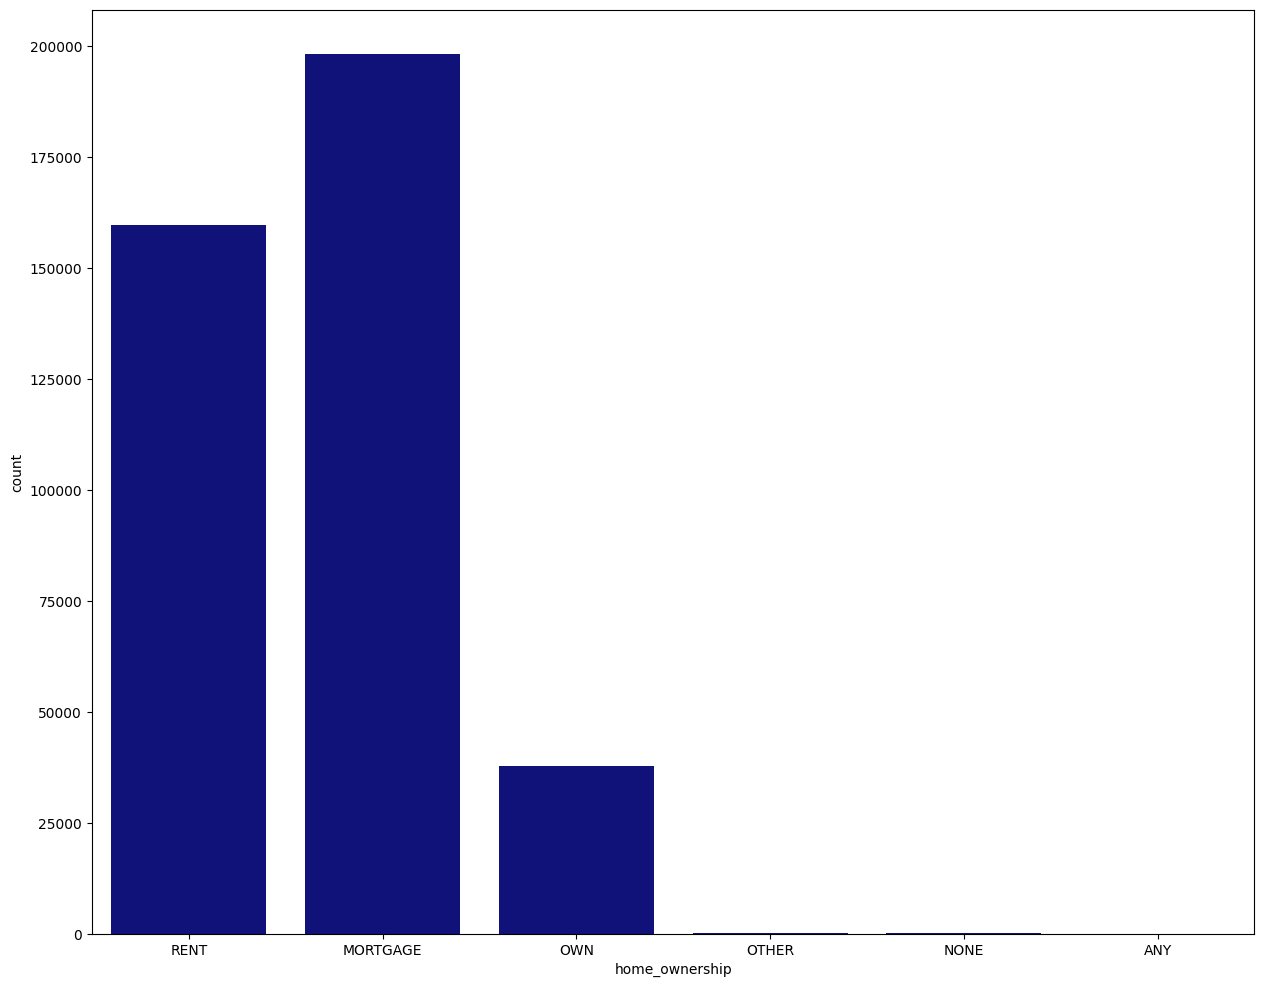

In [312]:
plt.figure(figsize=(15,12))
sns.countplot(data = lt, x= "home_ownership",color = "darkblue")
plt.show()

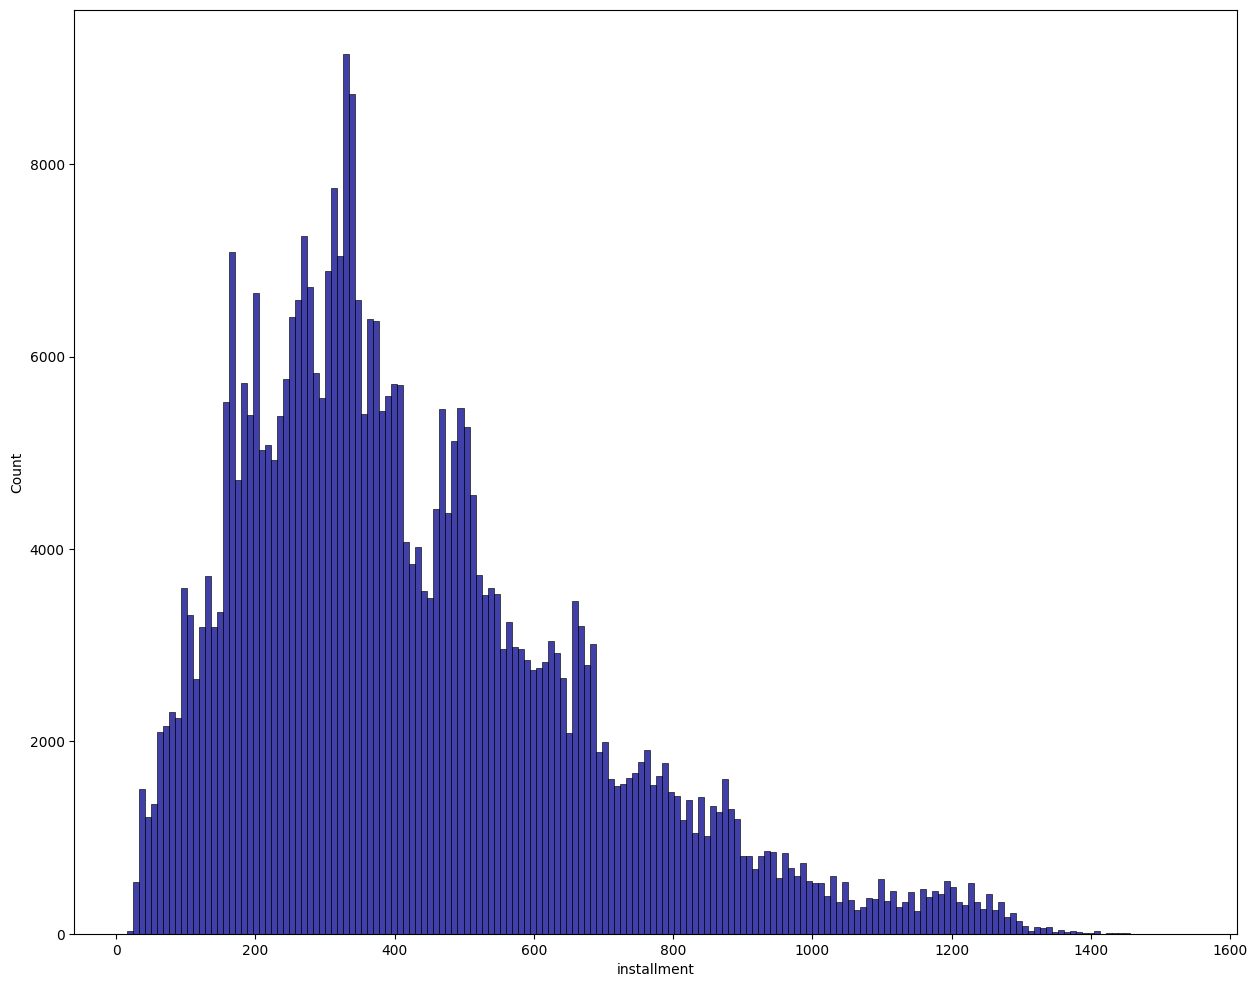

In [313]:
plt.figure(figsize=(15,12))
sns.histplot(data = lt, x= "installment",color = "darkblue")
plt.show()

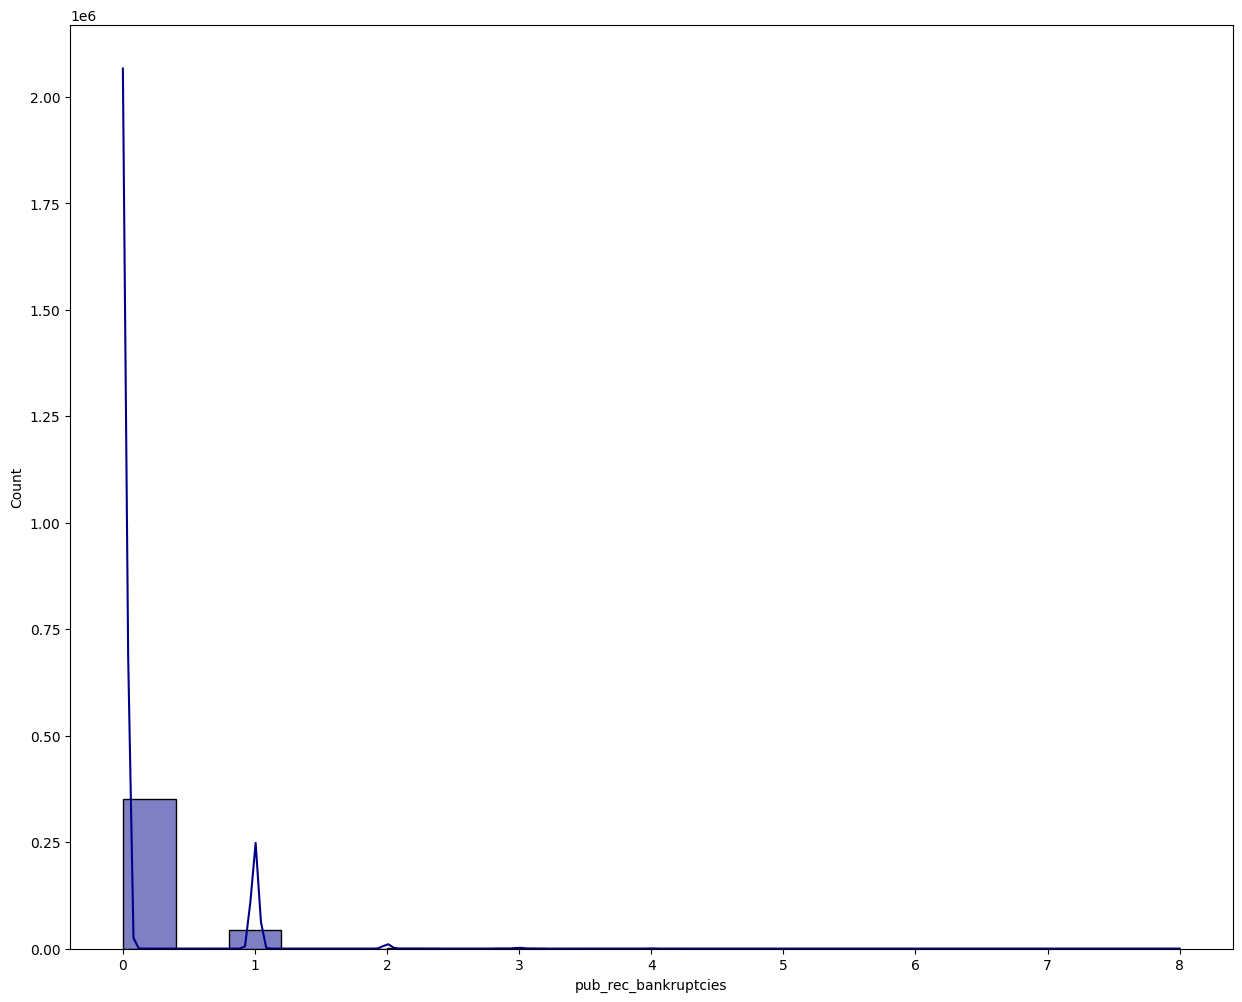

In [314]:
plt.figure(figsize=(15,12))
sns.histplot(data = lt, x= "pub_rec_bankruptcies", kde = True,color = "darkblue")
plt.show()

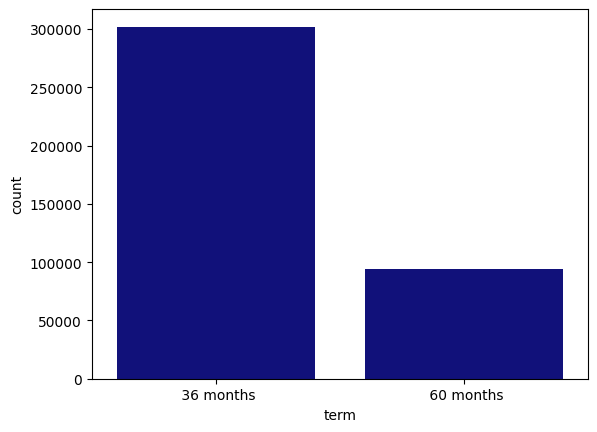

In [315]:

sns.countplot(data = lt, x= "term",color = "darkblue")
plt.show()

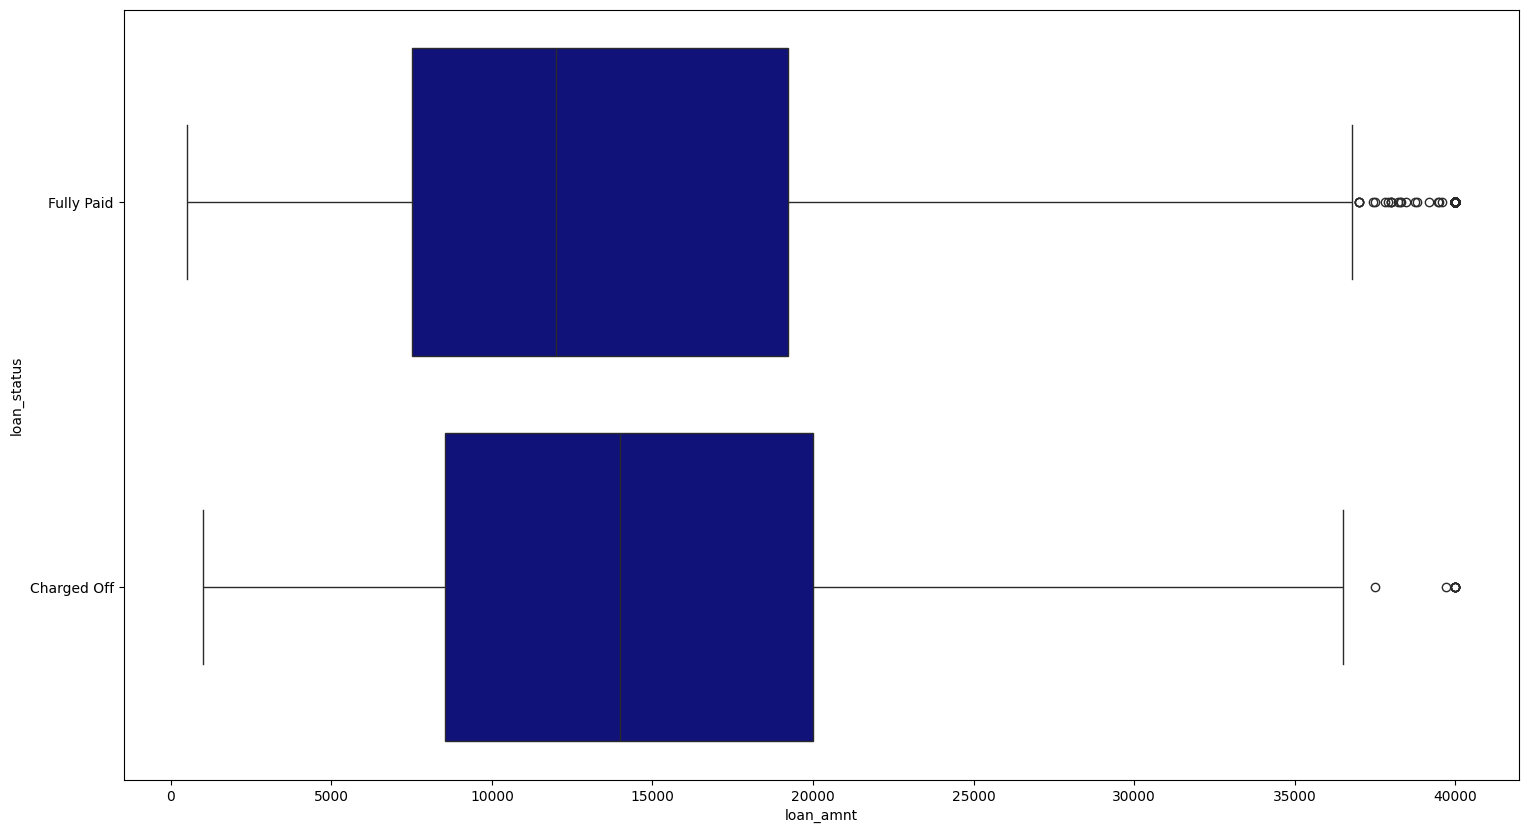

In [316]:
plt.figure(figsize=(18,10))
sns.boxplot(data = lt, x= "loan_amnt", y = "loan_status", color = "darkblue")
plt.show()

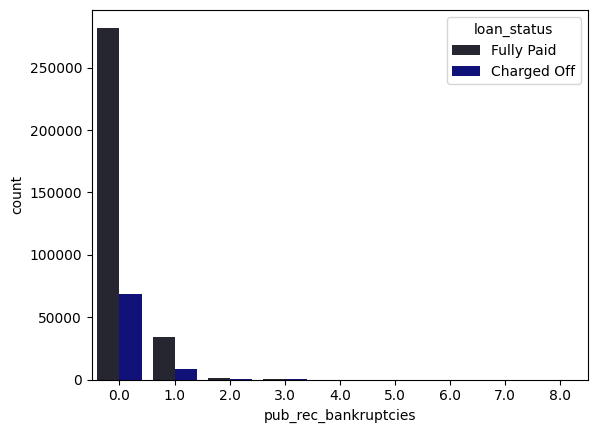

In [317]:
sns.countplot(data = lt, x= "pub_rec_bankruptcies", hue = "loan_status", palette='dark:darkblue')
plt.show()

majority of them are 0.0 so we have to transform data

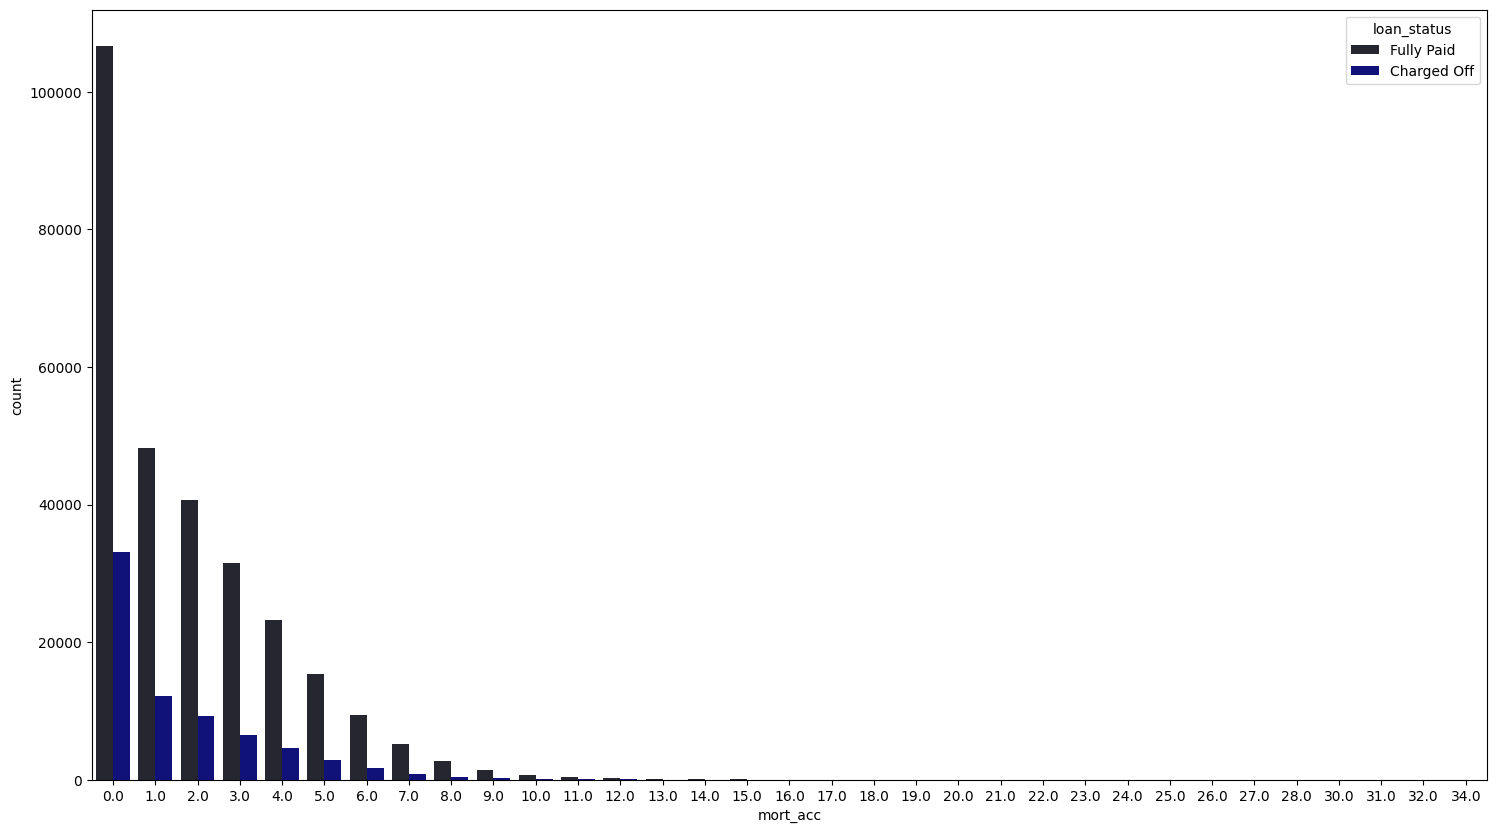

In [318]:
plt.figure(figsize=(18,10))
sns.countplot(data = lt, x= "mort_acc", hue = "loan_status", palette='dark:darkblue')
plt.show()

majority of them are 0.0 so we have to transform data

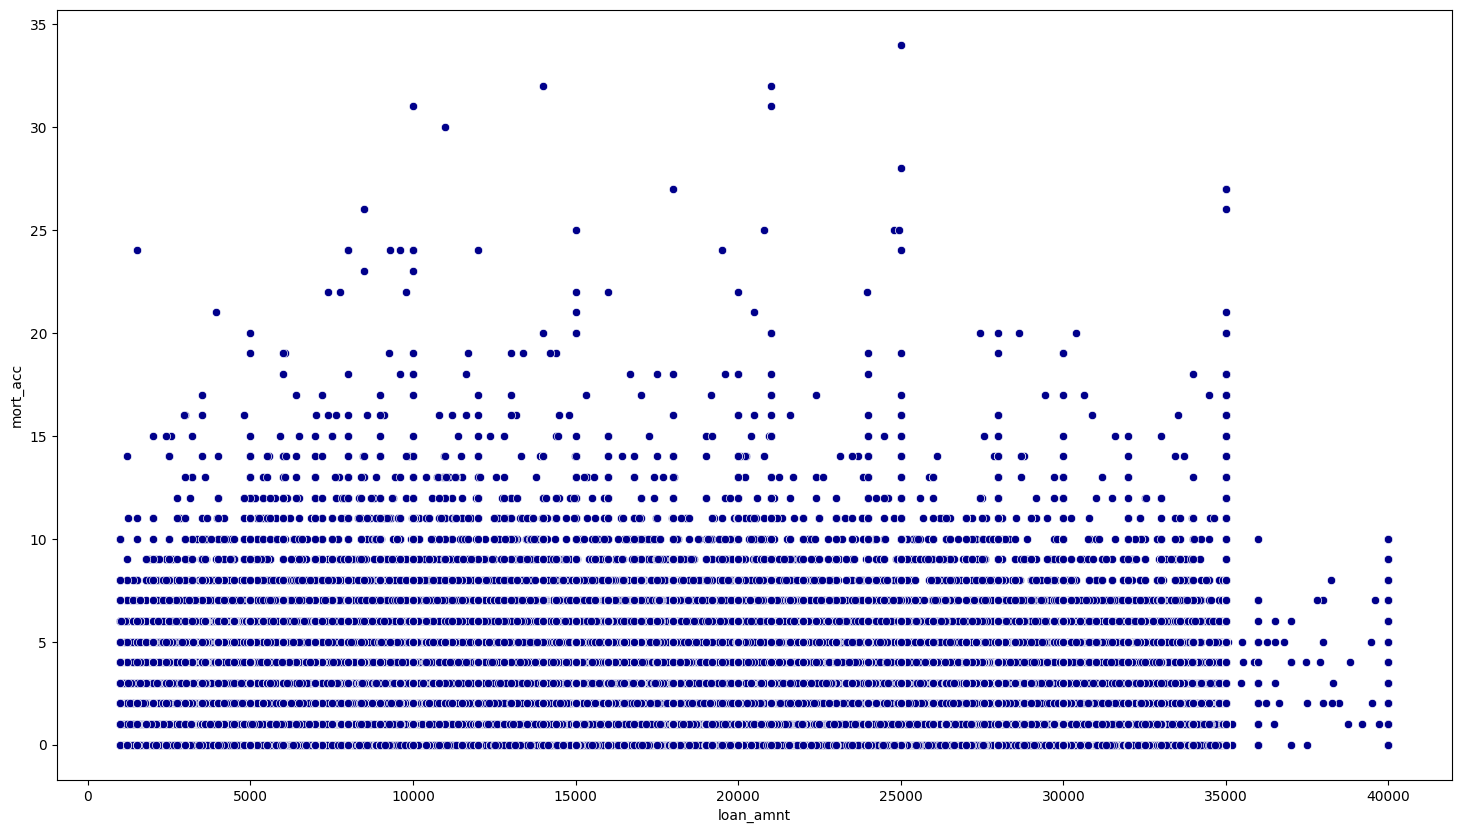

In [319]:
plt.figure(figsize=(18,10))
sns.scatterplot(data = lt, x= "loan_amnt", y = "mort_acc", color='darkblue')
plt.show()

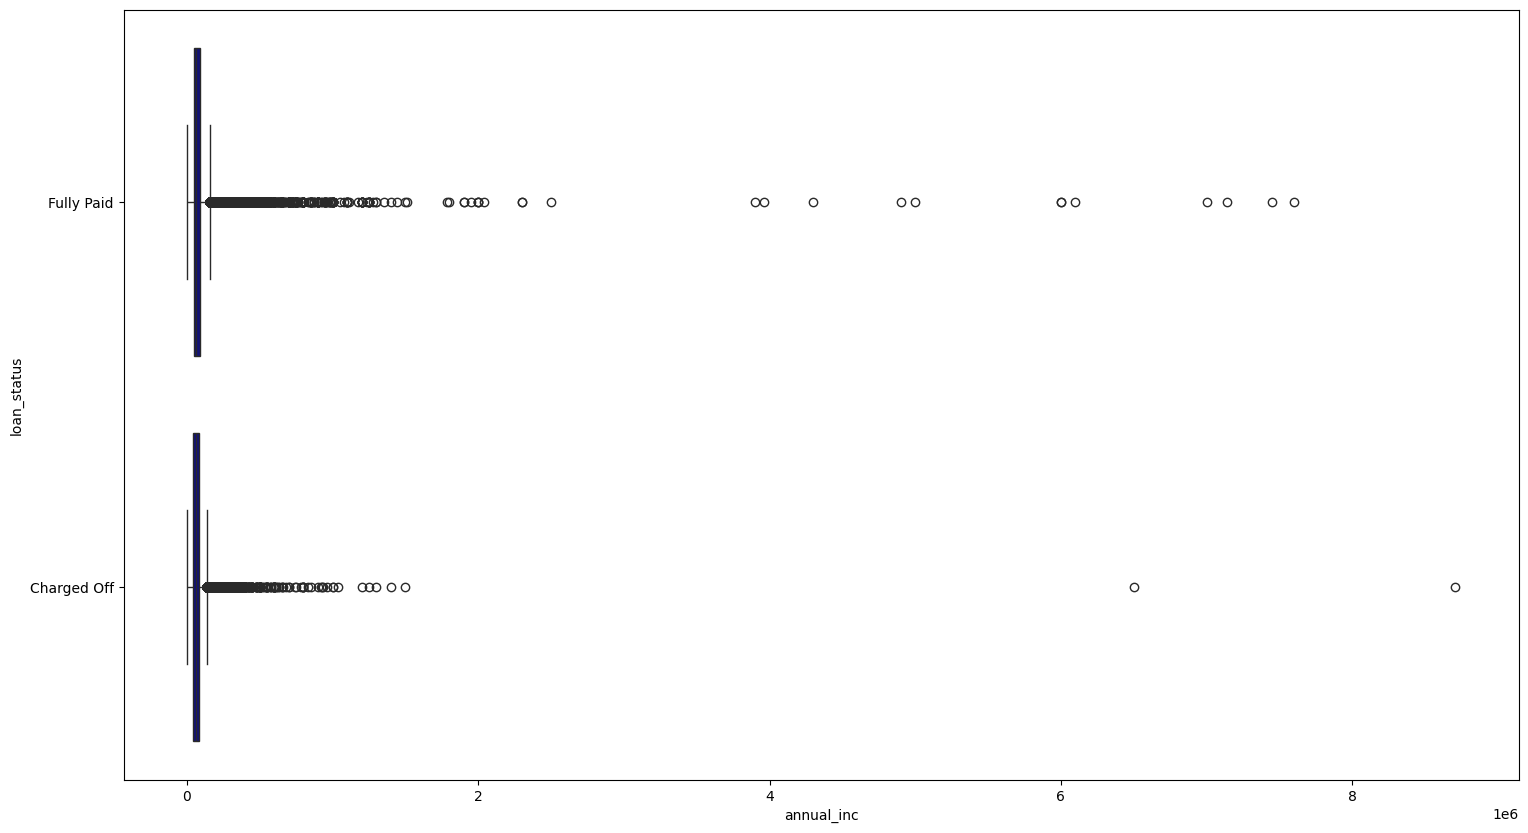

In [320]:
plt.figure(figsize=(18,10))
sns.boxplot(data = lt, x= "annual_inc", y= "loan_status", color='darkblue')
plt.show()

The annual income of fully paid customers has more outliers.

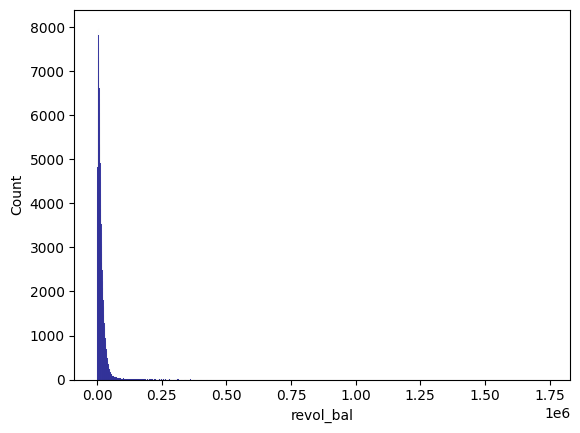

In [321]:

sns.histplot(data = lt, x= "revol_bal", color='darkblue')
plt.show()

 right-skewed data we have to do data transform and remove outliers

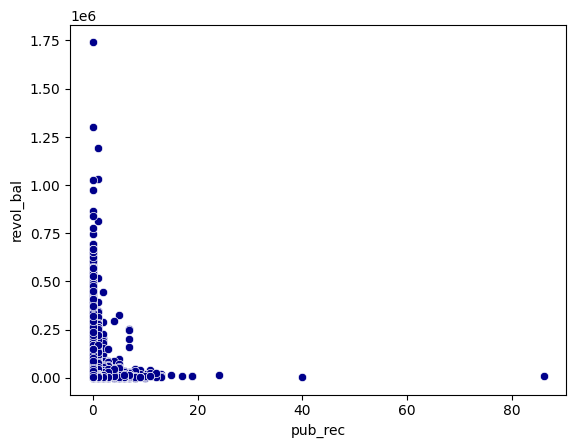

In [322]:

sns.scatterplot(data = lt, x= "pub_rec",y = "revol_bal", color='darkblue')
plt.show()

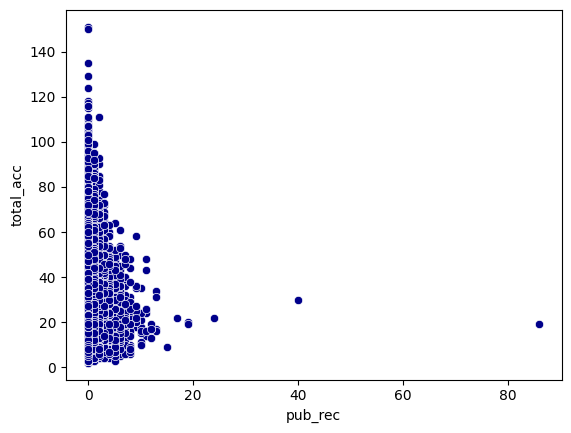

In [323]:
sns.scatterplot(data = lt, x= "pub_rec",y = "total_acc", color='darkblue')
plt.show()

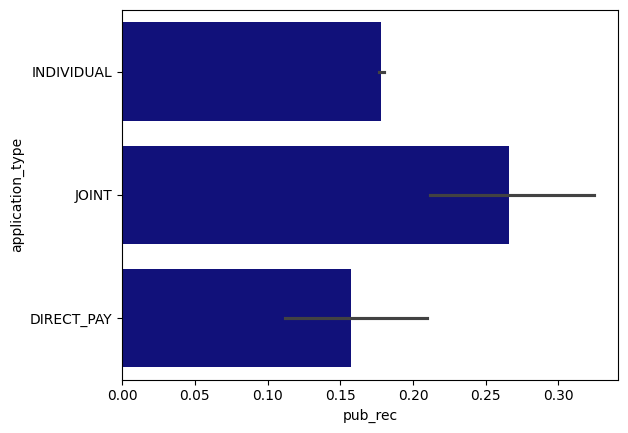

In [324]:
sns.barplot(data = lt, x= "pub_rec",y= "application_type", color='darkblue')
plt.show()

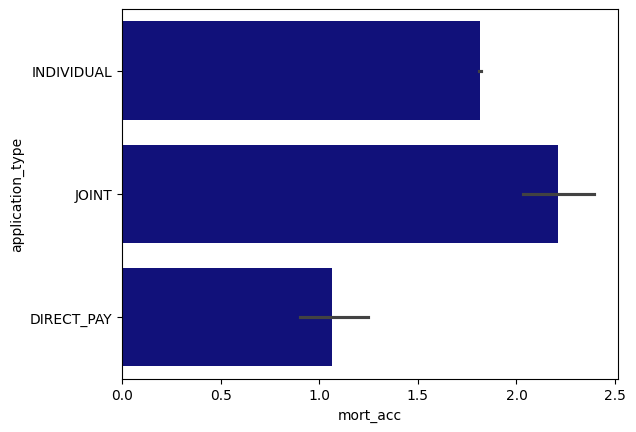

In [325]:
sns.barplot(data = lt, x= "mort_acc",y= "application_type", color='darkblue')
plt.show()

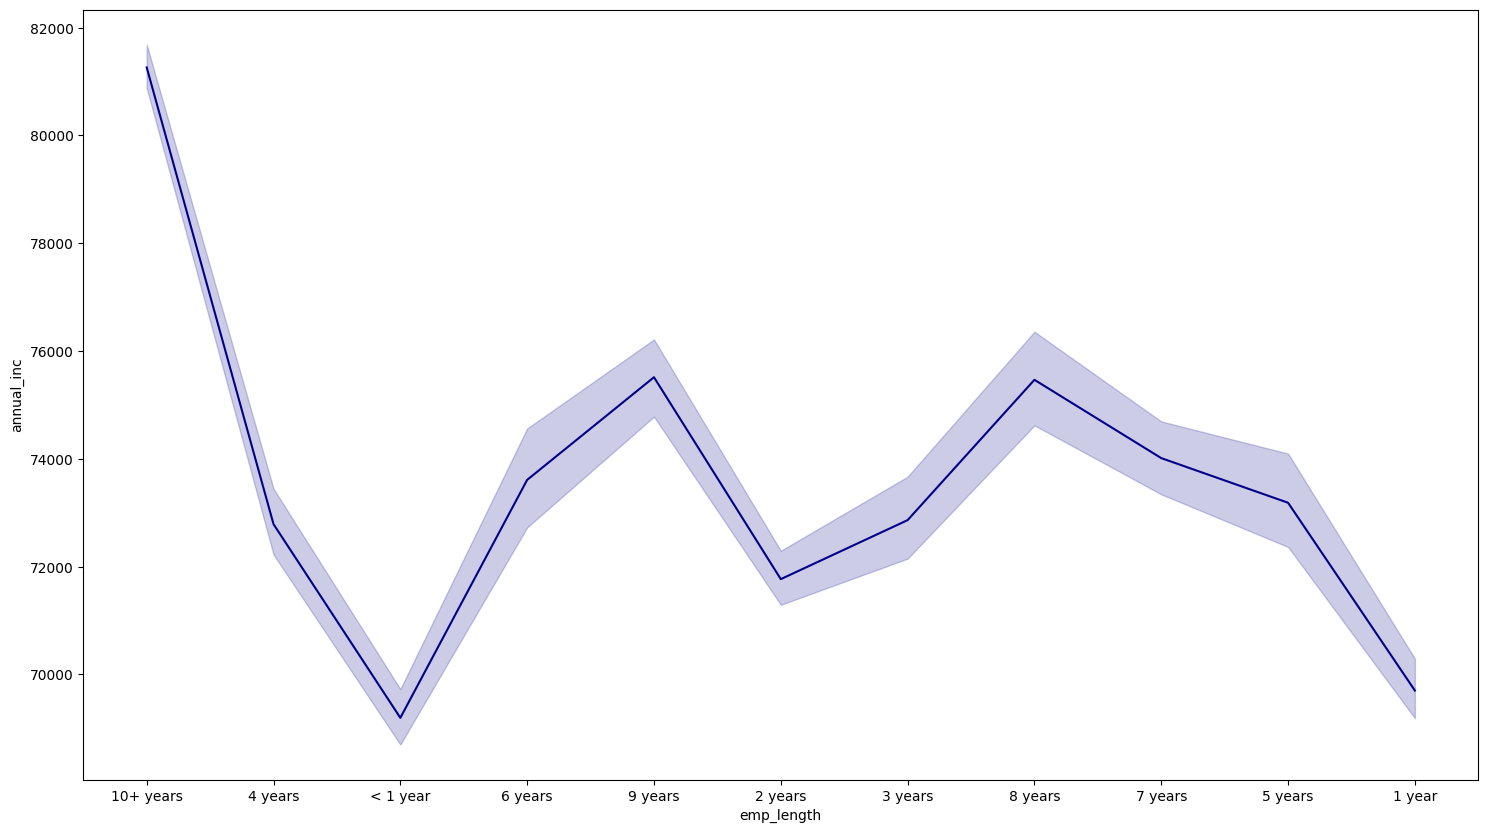

In [326]:
plt.figure(figsize=(18,10))
sns.lineplot(data = lt, x= "emp_length",y= "annual_inc", color='darkblue')
plt.show()

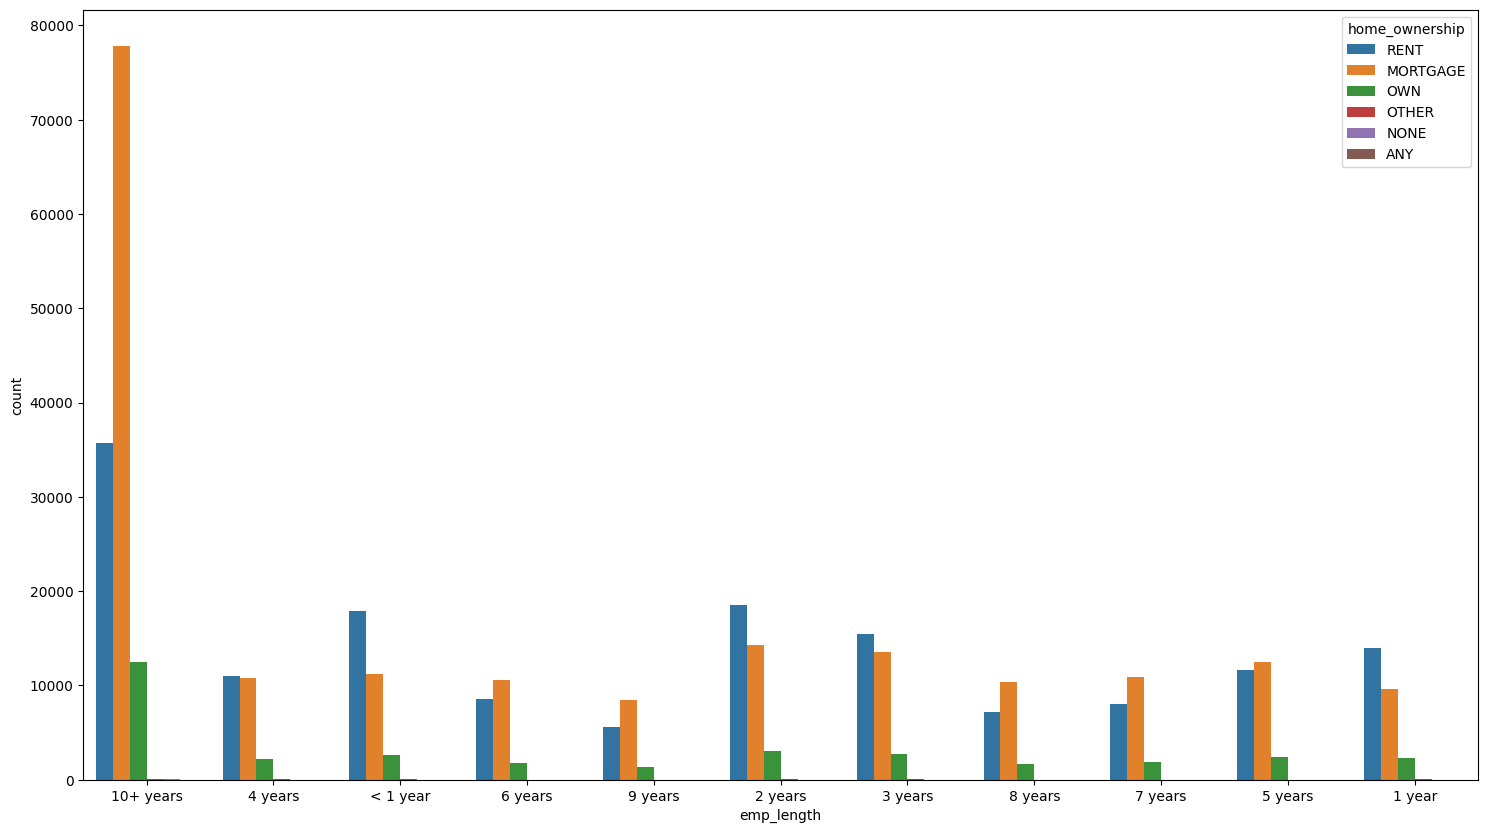

In [327]:
plt.figure(figsize=(18,10))
sns.countplot(data = lt, x= "emp_length",hue= "home_ownership")
plt.show()

In [328]:
lt["address"].nunique()

393700

In [329]:
len(lt)

396030

In [330]:
duplicates = lt[lt.duplicated(subset = ["address","home_ownership","application_type"],keep = False)]
duplicates.count().sum()

56815

In [331]:
len(duplicates)

2121

In [332]:
lt.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


removing the duplicates rows

In [333]:
lt_1 = lt.drop_duplicates(subset =["address","home_ownership","application_type"],keep = "first")
lt_1.reset_index(drop = True, inplace = True)
lt_1.tail()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
394888,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
394889,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
394890,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
394891,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
394892,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [334]:
len(lt_1)

394893

Very Important: Mode Imputation

In [335]:
for i in lt_1[lt_1["title"].isnull()]["loan_amnt"].unique():
    
    tit = lt_1[lt_1["loan_amnt"]==i]["title"].mode()

    if not tit.empty:
        imp = tit.values[0] 
        lt_1.loc[lt_1["loan_amnt"]==i ,"title"] = lt_1.loc[lt_1["loan_amnt"]==i,"title"].fillna(imp)

In [336]:
lt_1[lt_1["title"].isnull()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
72970,39500.0,36 months,5.32,1189.54,A,A1,Manager,8 years,MORTGAGE,217500.0,...,12.0,0.0,3875.0,4.8,25.0,w,INDIVIDUAL,2.0,0.0,USNV Butler\r\nFPO AA 70466


In [337]:
rest = lt_1["title"].mode()[0]

In [338]:
lt_1["title"].fillna(rest, inplace = True)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2448987105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["title"].fillna(rest, inplace = True)


In [339]:
lt_1["title"].isnull().sum()

0

In [340]:
lt_1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22856
emp_length              18244
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37686
pub_rec_bankruptcies      533
address                     0
dtype: int64

In [341]:
for i in lt_1[lt_1["emp_title"].isnull()]["loan_amnt"].unique():
    md = lt_1[lt_1["loan_amnt"] == i]["emp_title"].mode()

    if not md.empty:
        imp = md.values[0]
        lt_1.loc[lt_1["loan_amnt"]== i,"emp_title"] = lt_1.loc[lt_1["loan_amnt"] == i,"emp_title"].fillna(imp)



In [342]:
lt_1["emp_title"].isnull().sum()

1

In [343]:
res = lt_1["emp_title"].mode()[0]
lt_1["emp_title"].fillna(res,inplace= True)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\1583918485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["emp_title"].fillna(res,inplace= True)


In [344]:
lt_1["emp_title"].isnull().sum()

0

In [345]:
lt_1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18244
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37686
pub_rec_bankruptcies      533
address                     0
dtype: int64

In [346]:
for i in lt_1[lt_1["emp_length"].isnull()]["annual_inc"].unique():
    emp_mod = lt_1[lt_1["annual_inc"] == i]["emp_length"].mode()
    if not emp_mod.empty:
        imp = emp_mod.values[0]
        lt_1.loc[lt_1["annual_inc"] == i,"emp_length"] = lt_1.loc[lt_1["annual_inc"] == i,"emp_length"].fillna(imp)


In [347]:
lt_1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length               3326
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37686
pub_rec_bankruptcies      533
address                     0
dtype: int64

In [348]:
for i in lt_1[lt_1["emp_length"].isnull()]["loan_amnt"].unique():
    emp_mod1 = lt_1[lt_1["loan_amnt"] == i]["emp_length"].mode()
    if not emp_mod1.empty:
        imp = emp_mod1.values[0]
        lt_1.loc[lt_1["loan_amnt"] == i, "emp_length"] = lt_1.loc[lt_1["loan_amnt"] == i, "emp_length"].fillna(imp)

In [349]:
res = lt_1["emp_length"].mode()[0]
lt_1["emp_length"] = lt_1["emp_length"].fillna(res)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2725950145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["emp_length"] = lt_1["emp_length"].fillna(res)


In [350]:
lt_1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37686
pub_rec_bankruptcies      533
address                     0
dtype: int64

In [351]:
lt_1["total_acc"].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [352]:
for i in lt_1[lt_1["revol_util"].isnull()]["open_acc"].unique():
    rev_mod = lt_1[lt_1["open_acc"] == i]["revol_util"].mode()
    if not rev_mod.empty:
        imp = rev_mod.values[0]
        lt_1.loc[lt_1["open_acc"] == i, "revol_util"] = lt_1.loc[lt_1["open_acc"] == i, "revol_util"].fillna(imp)

In [353]:
lt_1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  6
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37686
pub_rec_bankruptcies      533
address                     0
dtype: int64

In [354]:
mod = lt_1["revol_util"].mean()
mod

53.75303033526049

In [355]:
lt_1["revol_util"].fillna(mod, inplace = True)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\3246484121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["revol_util"].fillna(mod, inplace = True)


In [356]:
lt_1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37686
pub_rec_bankruptcies      533
address                     0
dtype: int64

In [357]:
for i in lt_1[lt_1["mort_acc"].isnull()]["grade"].unique():
    rev_mod = lt_1[lt_1["grade"] == i]["mort_acc"].mode()
    if not rev_mod.empty:
        imp = rev_mod.values[0]
        lt_1.loc[lt_1["grade"] == i, "mort_acc"] = lt_1.loc[lt_1["grade"] == i, "mort_acc"].fillna(imp)

In [358]:
lt_1.isnull().sum()


loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                     0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    533
address                   0
dtype: int64

In [359]:
for i in lt_1[lt_1["pub_rec_bankruptcies"].isnull()]["pub_rec"].unique():
    rev_mod = lt_1[lt_1["pub_rec"] == i]["pub_rec_bankruptcies"].mode()
    if not rev_mod.empty:
        imp = rev_mod.values[0]
        lt_1.loc[lt_1["pub_rec"] == i, "pub_rec_bankruptcies"] = lt_1.loc[lt_1["pub_rec"] == i, "pub_rec_bankruptcies"].fillna(imp)

In [360]:
lt_1.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Bivariate analysis Visualization -

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\1840673526.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


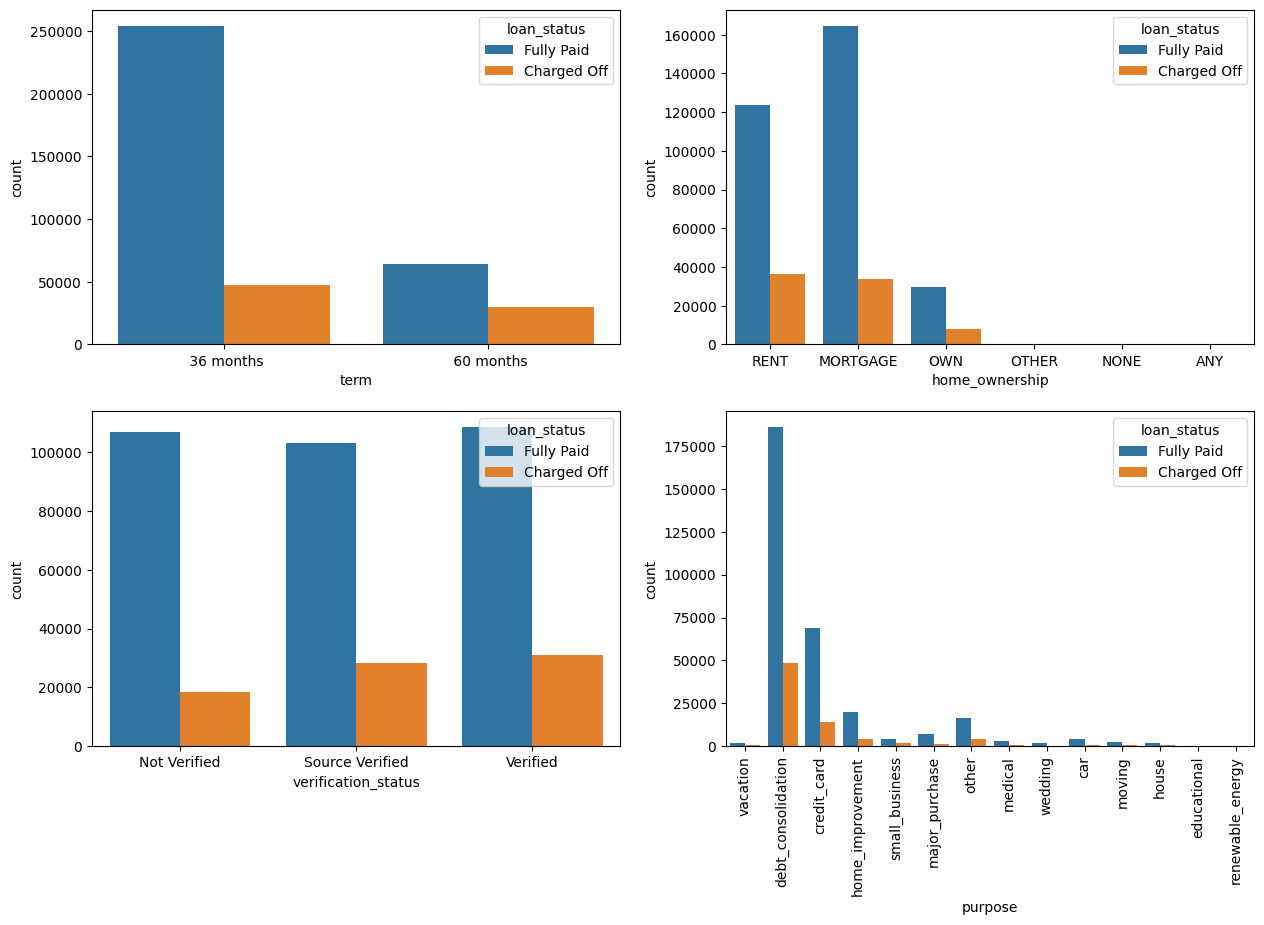

In [361]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=lt, hue='loan_status')
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=lt, hue='loan_status')
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=lt, hue='loan_status')
plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=lt, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);


Mortgage homeowners are mostly fully paid, while homeowners who own their homes outright apply for loans less frequently compared to others.

The majority of borrowers choose a 36-month loan term for repayment.

Debt consolidation and credit card loans account for a significant percentage of loan applicants

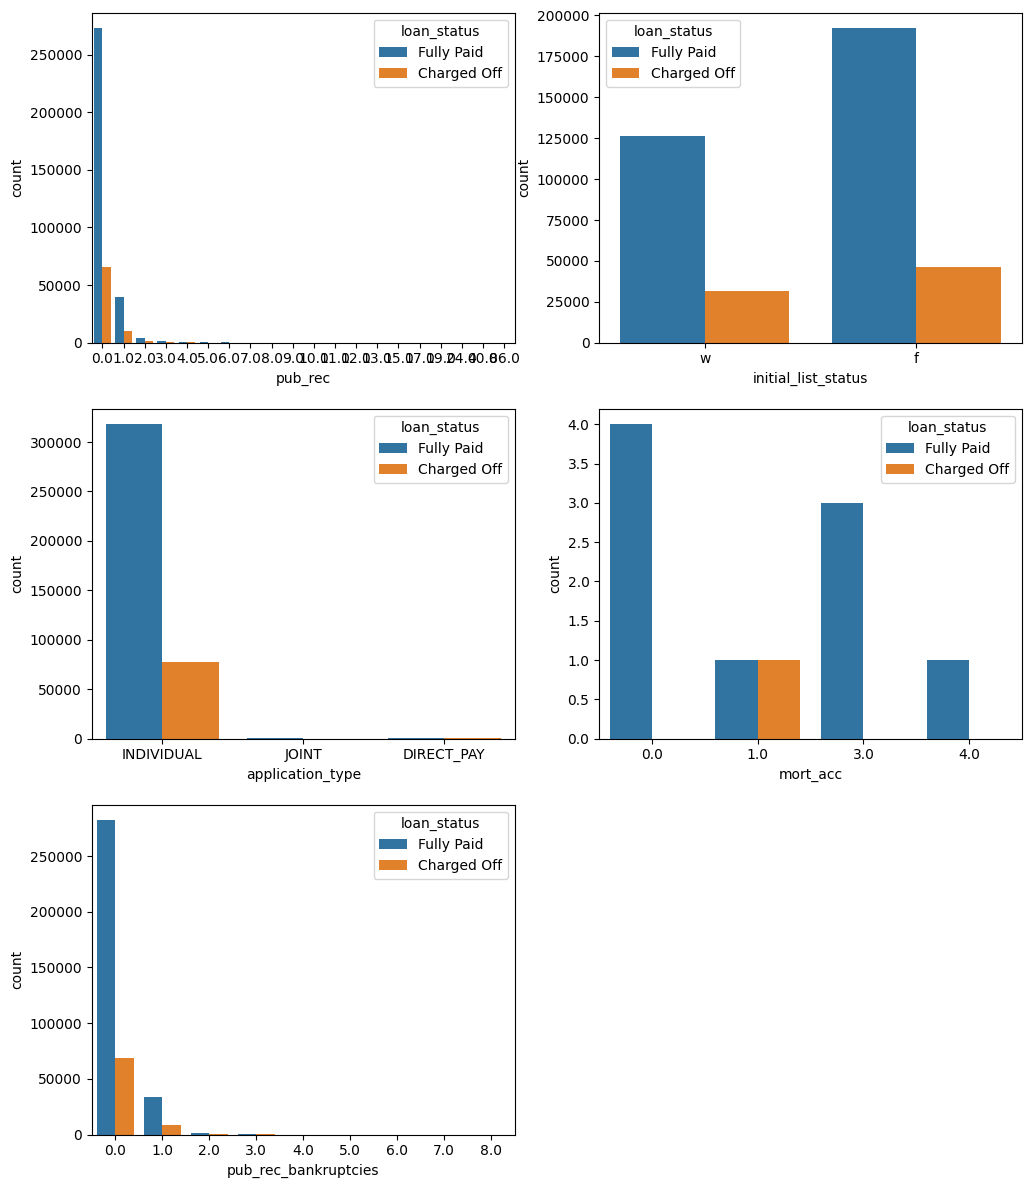

In [362]:
plt.figure(figsize=(12, 30))
plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=lt, hue='loan_status')
plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=lt, hue='loan_status')
plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=lt, hue='loan_status')
plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=lt[:10], hue='loan_status')
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=lt, hue='loan_status')
plt.show()

Outlier Detection & Treatment -

Univariate analysis Visualization 

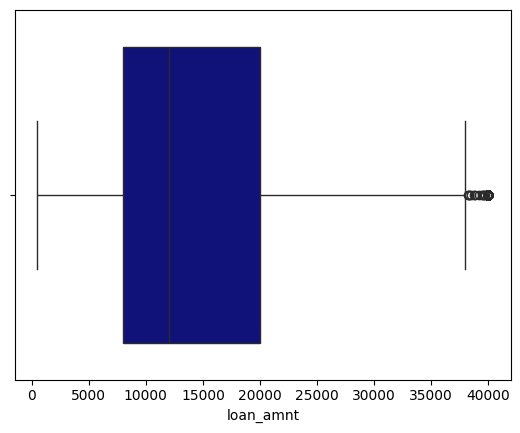

In [363]:

sns.boxplot(data = lt, x= "loan_amnt", color = "darkblue")
plt.show()

loan_amnt                  Axes(0.125,0.653529;0.0945122x0.226471)
int_rate                Axes(0.238415,0.653529;0.0945122x0.226471)
installment             Axes(0.351829,0.653529;0.0945122x0.226471)
annual_inc              Axes(0.465244,0.653529;0.0945122x0.226471)
dti                     Axes(0.578659,0.653529;0.0945122x0.226471)
open_acc                Axes(0.692073,0.653529;0.0945122x0.226471)
pub_rec                 Axes(0.805488,0.653529;0.0945122x0.226471)
revol_bal                  Axes(0.125,0.381765;0.0945122x0.226471)
revol_util              Axes(0.238415,0.381765;0.0945122x0.226471)
total_acc               Axes(0.351829,0.381765;0.0945122x0.226471)
mort_acc                Axes(0.465244,0.381765;0.0945122x0.226471)
pub_rec_bankruptcies    Axes(0.578659,0.381765;0.0945122x0.226471)
dtype: object

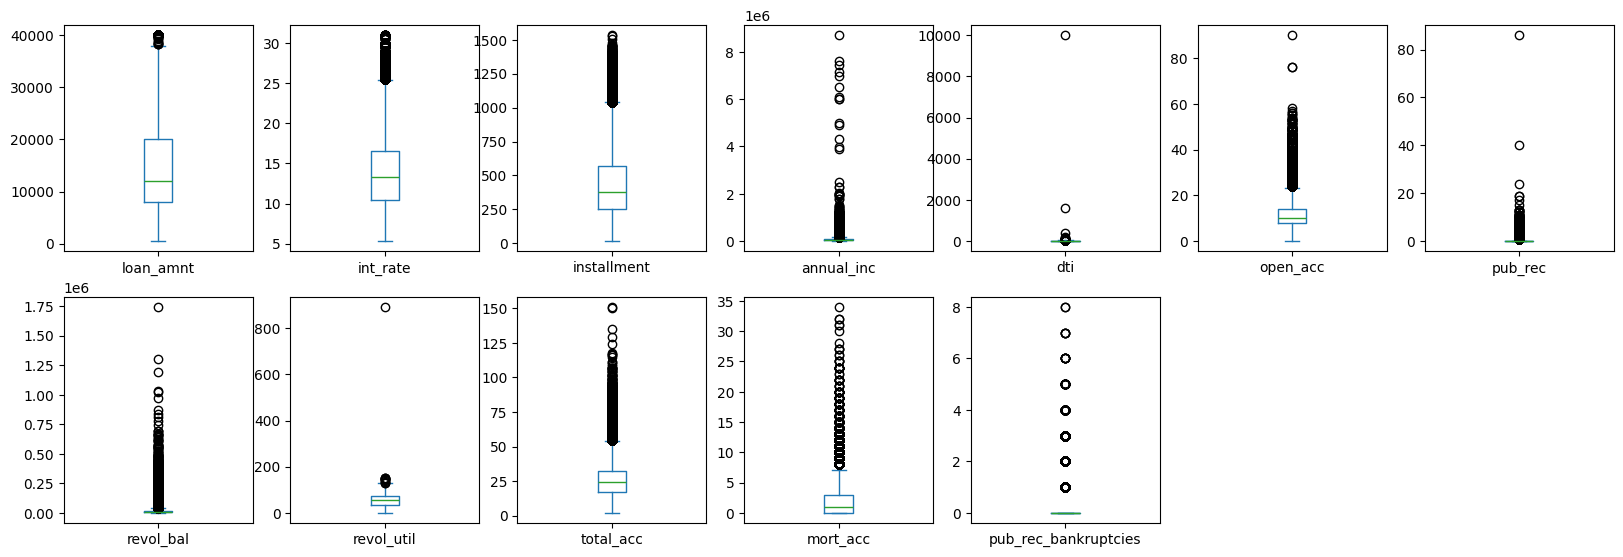

In [364]:
lt_1.plot(kind = "box", subplots = True, layout = (3,7), sharex = False, sharey = False, figsize = (20,10))

A high percentage of loan applicants are individuals

In [365]:
len(lt_1[lt_1["loan_amnt"] > 37500])

196

In [366]:
lt_1["loan_amnt"].max()

40000.0

In [367]:
len(lt_1["loan_amnt"])

394893

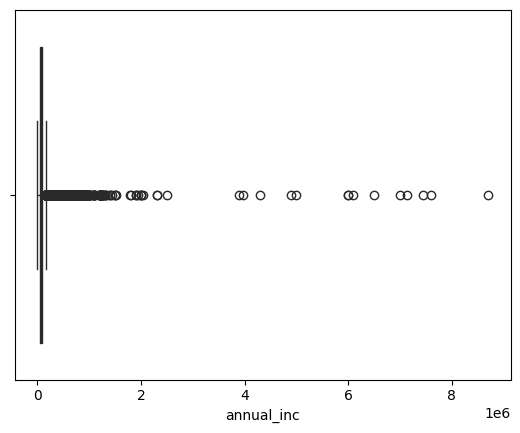

In [368]:
sns.boxplot(data = lt, x= "annual_inc", color = "darkblue")
plt.show()

In [369]:
lt_1["annual_inc"].value_counts()

annual_inc
60000.00    15276
50000.00    13274
65000.00    11294
70000.00    10645
40000.00    10591
            ...  
42338.00        1
83135.00        1
74527.00        1
67025.00        1
31789.88        1
Name: count, Length: 27137, dtype: int64

Calculate IQR

In [370]:
Q1 = lt_1["annual_inc"].quantile(0.25)
Q3 = lt_1["annual_inc"].quantile(0.75)


IQR = Q3 - Q1

In [371]:
IQR

45000.0

In [372]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [373]:
outliers = lt_1[(lt_1["annual_inc"] < lower_bound) | (lt_1["annual_inc"] > upper_bound)]

In [374]:
len(outliers)

16650

In [375]:
outliers.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,16650.000000,16650.000000,16650.000000,1.665000e+04,16650.000000,16650.000000,16650.000000,1.665000e+04,16650.000000,16650.000000,16650.000000,16650.000000
mean,22977.500000,12.938095,702.263032,2.337445e+05,11.927136,13.200120,0.163724,4.095221e+04,55.271524,31.723003,3.157237,0.057477
std,9555.069589,4.807472,309.252815,2.086365e+05,6.618576,5.783245,0.613270,6.229519e+04,26.373856,12.931424,2.859918,0.252799
min,1000.000000,5.320000,30.440000,1.575280e+05,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,15000.000000,8.900000,467.030000,1.750000e+05,7.090000,9.000000,0.000000,1.188775e+04,36.100000,23.000000,1.000000,0.000000
50%,24000.000000,12.490000,692.780000,1.992000e+05,11.100000,12.000000,0.000000,2.503200e+04,57.800000,30.000000,3.000000,0.000000
75%,32000.000000,16.200000,918.250000,2.450000e+05,15.860000,16.000000,0.000000,4.433675e+04,76.700000,40.000000,5.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,42.150000,58.000000,13.000000,1.743266e+06,153.000000,151.000000,34.000000,5.000000


In [376]:
lt_1.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,394893.000000,394893.000000,394893.000000,3.948930e+05,394893.000000,394893.000000,394893.000000,3.948930e+05,394893.000000,394893.000000,394893.000000,394893.000000
mean,14113.769996,13.639050,431.841014,7.420238e+04,17.380156,11.311153,0.178198,1.584187e+04,53.753030,25.413798,1.640743,0.121539
std,8357.533434,4.471929,250.729861,6.167697e+04,18.039964,5.137796,0.530784,2.058063e+04,24.483025,11.885743,2.111391,0.356017
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.024000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.961700e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


using capping method to reduce the outliers

In [377]:
def capping(df,column):
    lower = 0.5
    upper = 0.95

    lower_bound = lt_1[column].quantile(lower)
    upper_bound = lt_1[column].quantile(upper)
    lt_1[column] = lt_1[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)



In [378]:
capping(lt_1, "loan_amnt")
capping(lt_1, "annual_inc")
capping(lt_1, "revol_bal")

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\551722687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1[column] = lt_1[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\551722687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1[column] = lt_1[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
C:\Users\satheeskumar\AppData\Local\

In [379]:
lt_1["loan_amnt"].max()

30975.0

In [380]:
lt_1["revol_bal"].max()

41064.79999999993

In [381]:
lt_1["annual_inc"].max()

150000.0

In [382]:
lt_1["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    349884
1.0     42692
2.0      1841
3.0       349
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

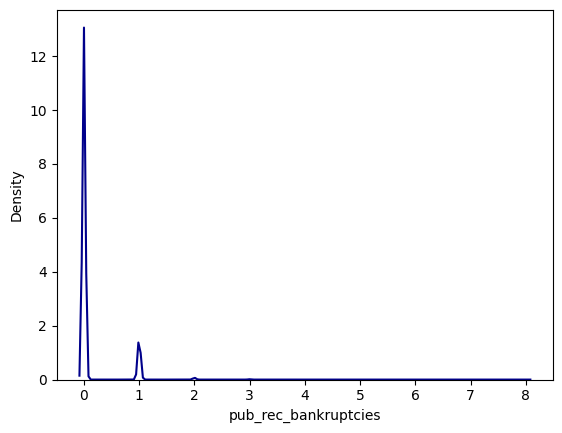

In [383]:
sns.kdeplot(data = lt_1, x= "pub_rec_bankruptcies", color = "darkblue")
plt.show()

Feature Engineering -

In [384]:

def pub_rec(number):
    if number == 0.0:
         return 0
    else:
         return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
         return 1
    else:
         return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
         return 0
    elif number >= 1.0:
         return 1
    else:
         return number

In [385]:
#pub_rec_bankruptcies(lt_1, "pub_rec_bankruptcies")
lt_1['pub_rec_bankruptcies'] = lt_1.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)
lt_1["pub_rec_bankruptcies"].value_counts()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\1852188074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1['pub_rec_bankruptcies'] = lt_1.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)


pub_rec_bankruptcies
0    349884
1     45009
Name: count, dtype: int64

In [386]:
lt_1.loc[36854]	

loan_amnt                                                         12000.0
term                                                            36 months
int_rate                                                            22.47
installment                                                         149.9
grade                                                                   E
sub_grade                                                              E5
emp_title                                                       pizza hut
emp_length                                                         1 year
home_ownership                                                       RENT
annual_inc                                                        64000.0
verification_status                                              Verified
issue_d                                                          Apr-2013
loan_status                                                   Charged Off
purpose                               

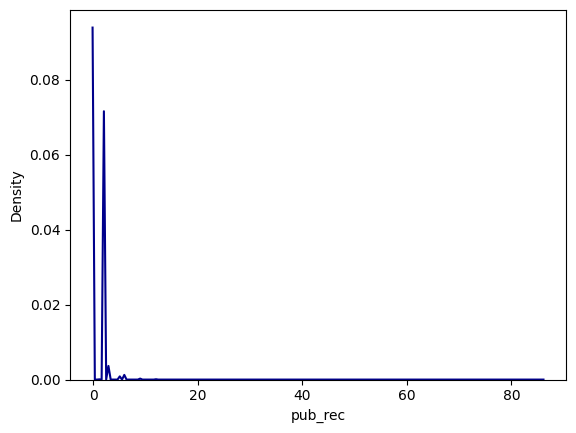

In [387]:
sns.kdeplot(data = lt_1, x= "pub_rec", color = "darkblue")
plt.show()

In [388]:
lt_1["pub_rec"].value_counts()

pub_rec
0.0     337298
1.0      49602
2.0       5458
3.0       1514
4.0        527
5.0        237
6.0        121
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [389]:
lt_1["pub_rec"]= lt_1.pub_rec.apply(pub_rec)
lt_1["pub_rec"].value_counts()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2115535303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["pub_rec"]= lt_1.pub_rec.apply(pub_rec)


pub_rec
0    337298
1     57595
Name: count, dtype: int64

In [390]:
lt_1["revol_util"].value_counts()

revol_util
0.00      2468
53.00      749
60.00      739
61.00      733
55.00      728
          ... 
111.10       1
0.75         1
146.10       1
109.30       1
128.10       1
Name: count, Length: 1227, dtype: int64

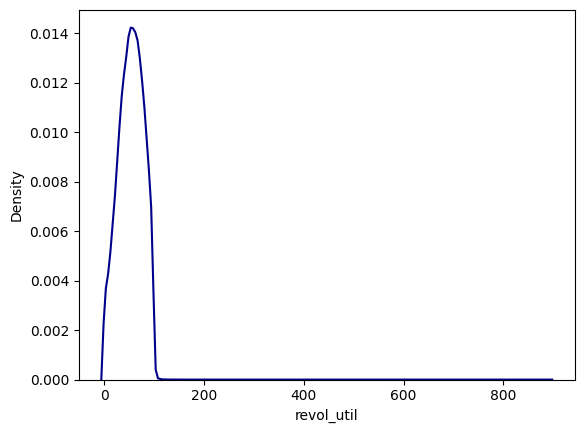

In [391]:
sns.kdeplot(data = lt_1, x= "revol_util", color = "darkblue")
plt.show()

Transforming the data from right-skewed to a normal distribution.

In [392]:
lt_1["new_revol_util"] = np.log1p(lt_1["revol_util"]) 

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2377550929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["new_revol_util"] = np.log1p(lt_1["revol_util"])


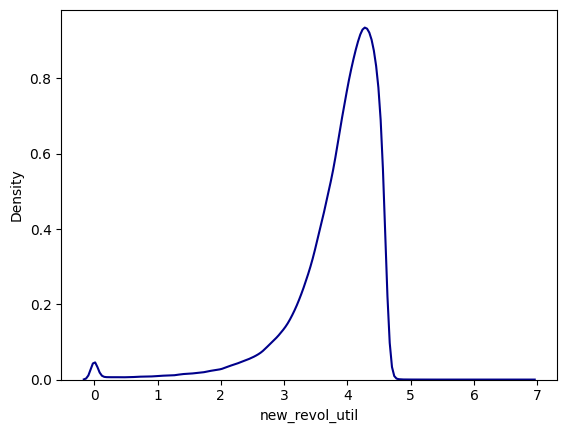

In [393]:
sns.kdeplot(data = lt_1, x= "new_revol_util", color = "darkblue")
plt.show()

In [394]:
lt_1["new_revol_util"].value_counts()

new_revol_util
0.000000    2468
3.988984     749
4.110874     739
4.127134     733
4.025352     728
            ... 
4.719391       1
0.559616       1
4.991113       1
4.703204       1
4.860587       1
Name: count, Length: 1227, dtype: int64

In [395]:
lt_1.drop(columns = "revol_util", axis = 1, inplace = True)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\4037442638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.drop(columns = "revol_util", axis = 1, inplace = True)


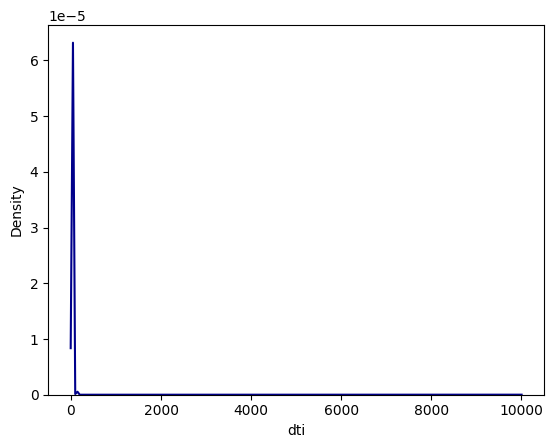

In [396]:
sns.kdeplot(data = lt_1, x= "dti", color = "darkblue")
plt.show()

In [397]:
lt_1["new_dti"] = np.log1p(lt_1["dti"])

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\1465669084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["new_dti"] = np.log1p(lt_1["dti"])


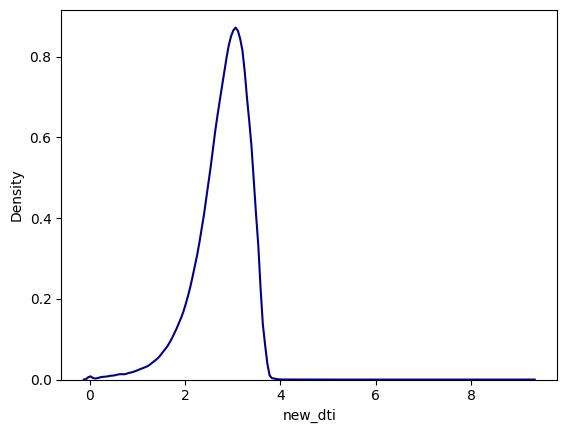

In [398]:
sns.kdeplot(data = lt_1, x= "new_dti", color = "darkblue")
plt.show()

drop old columns

In [399]:
lt_1.drop(columns = "dti", axis = 1,inplace = True)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\5412953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.drop(columns = "dti", axis = 1,inplace = True)


In [400]:
lt_1["pub_rec"].value_counts()

pub_rec
0    337298
1     57595
Name: count, dtype: int64

Data Preprocessing

In [401]:
lt_1["mort_acc"].value_counts()

mort_acc
0.0     177103
1.0      60225
2.0      49781
3.0      37942
4.0      27806
5.0      18135
6.0      11038
7.0       6036
8.0       3113
9.0       1655
10.0       862
11.0       477
12.0       263
13.0       146
14.0       107
15.0        61
16.0        37
17.0        21
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [402]:
lt_1['Mort_acc_flag'] = lt_1['mort_acc'].apply(lambda x: 1 if x > 0 else 0)
lt_1["Mort_acc_flag"].value_counts()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\752802284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1['Mort_acc_flag'] = lt_1['mort_acc'].apply(lambda x: 1 if x > 0 else 0)


Mort_acc_flag
1    217790
0    177103
Name: count, dtype: int64

In [403]:
lt_1.drop(columns = "mort_acc", axis = True,inplace = True)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\4214864223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.drop(columns = "mort_acc", axis = True,inplace = True)


In [404]:
lt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394893 entries, 0 to 394892
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             394893 non-null  float64
 1   term                  394893 non-null  object 
 2   int_rate              394893 non-null  float64
 3   installment           394893 non-null  float64
 4   grade                 394893 non-null  object 
 5   sub_grade             394893 non-null  object 
 6   emp_title             394893 non-null  object 
 7   emp_length            394893 non-null  object 
 8   home_ownership        394893 non-null  object 
 9   annual_inc            394893 non-null  float64
 10  verification_status   394893 non-null  object 
 11  issue_d               394893 non-null  object 
 12  loan_status           394893 non-null  object 
 13  purpose               394893 non-null  object 
 14  title                 394893 non-null  object 
 15  

Convert the column to date format.

In [405]:
lt_1.loc[:,"new_earliest_cr_line"] = pd.to_datetime(lt_1["earliest_cr_line"],errors = "coerce")

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\3627994710.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lt_1.loc[:,"new_earliest_cr_line"] = pd.to_datetime(lt_1["earliest_cr_line"],errors = "coerce")
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\3627994710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.loc[:,"new_earliest_cr_line"] = pd.to_datetime(lt_1["earliest_cr_line"],errors = "coerce")


In [406]:
lt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394893 entries, 0 to 394892
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             394893 non-null  float64       
 1   term                  394893 non-null  object        
 2   int_rate              394893 non-null  float64       
 3   installment           394893 non-null  float64       
 4   grade                 394893 non-null  object        
 5   sub_grade             394893 non-null  object        
 6   emp_title             394893 non-null  object        
 7   emp_length            394893 non-null  object        
 8   home_ownership        394893 non-null  object        
 9   annual_inc            394893 non-null  float64       
 10  verification_status   394893 non-null  object        
 11  issue_d               394893 non-null  object        
 12  loan_status           394893 non-null  object        
 13 

Split the new 'earliest_cr_line' date column into 'yearly_earliest_cr_line' and 'monthly_earliest_cr_line'.

In [407]:
lt_1.loc[:,"yearly_earliest_cr_line"] = lt_1["new_earliest_cr_line"].dt.year
lt_1.loc[:, "monthly_earliest_cr_line"] = lt_1["new_earliest_cr_line"].dt.month

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\3939309473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.loc[:,"yearly_earliest_cr_line"] = lt_1["new_earliest_cr_line"].dt.year
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\3939309473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.loc[:, "monthly_earliest_cr_line"] = lt_1["new_earliest_cr_line"].dt.month


Convert the column to date format.

Split the new 'new_issue_d' date column into 'issued_year' and 'issued_month'.

In [408]:
lt_1.loc[:,"new_issue_d"] = pd.to_datetime(lt_1["issue_d"])
lt_1.loc[:,"issued_year"] = lt_1["new_issue_d"].dt.year
lt_1.loc[:,"issued_month"] = lt_1["new_issue_d"].dt.month

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2266138378.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lt_1.loc[:,"new_issue_d"] = pd.to_datetime(lt_1["issue_d"])
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2266138378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.loc[:,"new_issue_d"] = pd.to_datetime(lt_1["issue_d"])
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2266138378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [409]:
lt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394893 entries, 0 to 394892
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   loan_amnt                 394893 non-null  float64       
 1   term                      394893 non-null  object        
 2   int_rate                  394893 non-null  float64       
 3   installment               394893 non-null  float64       
 4   grade                     394893 non-null  object        
 5   sub_grade                 394893 non-null  object        
 6   emp_title                 394893 non-null  object        
 7   emp_length                394893 non-null  object        
 8   home_ownership            394893 non-null  object        
 9   annual_inc                394893 non-null  float64       
 10  verification_status       394893 non-null  object        
 11  issue_d                   394893 non-null  object        
 12  lo

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\661245499.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


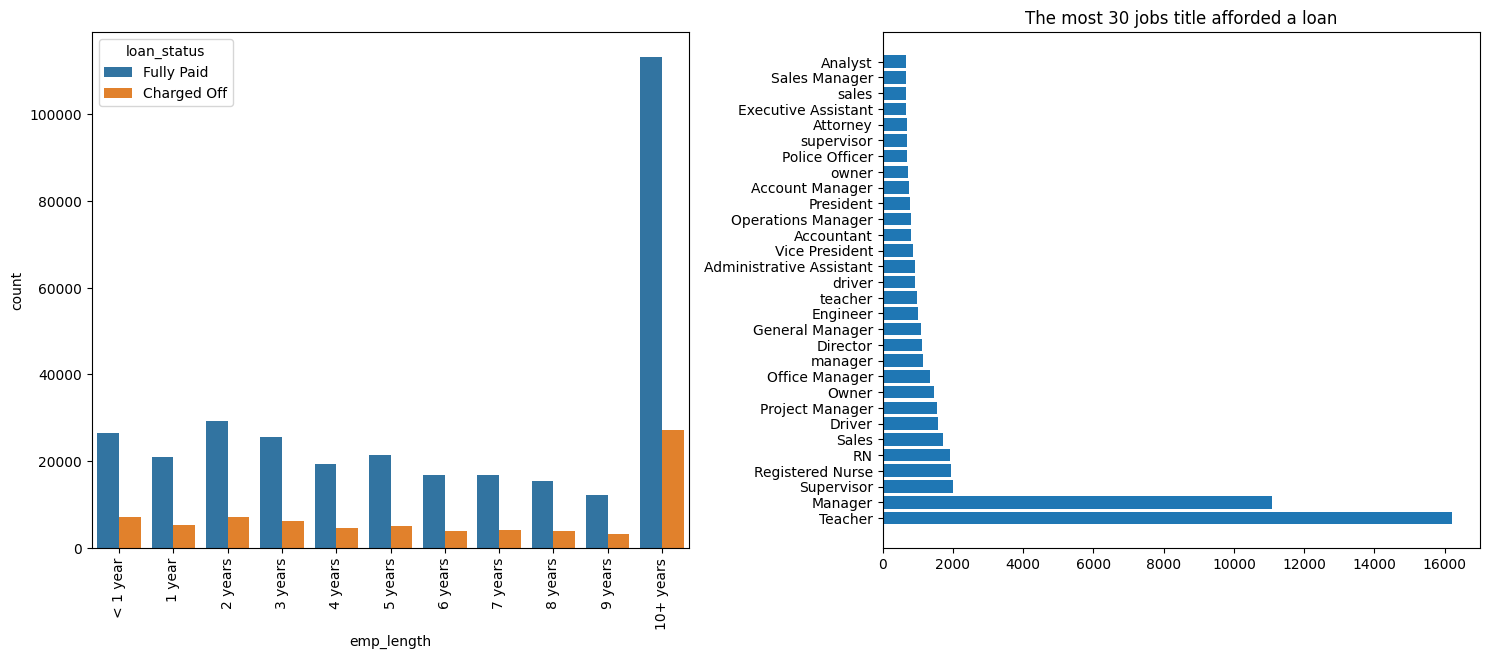

In [410]:

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
 '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data= lt_1, hue='loan_status', order = order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(lt_1.emp_title.value_counts()[:30].index, lt_1.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()


In [411]:
def clearning_emp_length(emp_length):
    if isinstance(emp_length, float) and np.isnan(emp_length):
        return np.nan
    elif "10+ years" in emp_length:
        return 10.0
    elif "< 1 year" in emp_length:
        return 0.5
    else:
        # Extract the number of years from the string (e.g., "5 years" -> 5.0)
        return float(emp_length.split()[0])

In [412]:
lt_1["emp_length"] = lt_1["emp_length"].apply(clearning_emp_length)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\2090312946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["emp_length"] = lt_1["emp_length"].apply(clearning_emp_length)


In [413]:
lt_1["emp_length"].dtype

dtype('float64')

In [414]:
lt_1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,address,new_revol_util,new_dti,Mort_acc_flag,new_earliest_cr_line,yearly_earliest_cr_line,monthly_earliest_cr_line,new_issue_d,issued_year,issued_month
0,12000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",3.756538,3.304686,0,1990-06-01,1990,6,2015-01-01,2015,1
1,12000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",3.994524,3.137666,1,2004-07-01,2004,7,2015-01-01,2015,1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0.5,RENT,64000.0,...,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",4.534748,2.623944,0,2007-08-01,2007,8,2015-01-01,2015,1
3,12000.0,36 months,6.49,220.65,A,A2,Client Advocate,6.0,RENT,64000.0,...,"823 Reid Ford\r\nDelacruzside, MA 00813",3.113515,1.280934,0,2006-09-01,2006,9,2014-11-01,2014,11
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,64000.0,...,"679 Luna Roads\r\nGreggshire, VA 11650",4.259859,3.553918,1,1999-03-01,1999,3,2013-04-01,2013,4


In [415]:
lt_1["address"]

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
394888     12951 Williams Crossing\r\nJohnnyville, DC 30723
394889    0114 Fowler Field Suite 028\r\nRachelborough, ...
394890    953 Matthew Points Suite 414\r\nReedfort, NY 7...
394891    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
394892        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 394893, dtype: object

Split the 'address' column into 'address_lines,' 'city,' 'state,' and 'zip_code.

In [416]:
def add_split(address):
    # Split by new line
    lines = address.splitlines()
    # Handle case where the address doesn't have enough lines
    if len(lines) < 2:
        return None, None, None, None

    address_lines = lines[0]
    city_zips = lines[1]
    
    # Split city, state, and zip
    if ", " in city_zips:
        lines_2 = city_zips.split(", ")
        city = lines_2[0]
    else:
        return address_lines, None, None, None  # Return if city_zips format is wrong
    
    # Split state and zip code
    if len(lines_2) > 1:
        zip_state = lines_2[1].strip()
        zips = zip_state.split(" ")
        if len(zips) == 2:
            state, zip_code = zips
        else:
            return address_lines, city, zips[0], None
    else:
        return address_lines, city, None, None
    
    return address_lines, city, state, zip_code


In [417]:
lt_1[["address_lines", "city","state","zip_code"]] = lt_1["address"].apply(lambda x : pd.Series(add_split(x)))

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\3362695135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1[["address_lines", "city","state","zip_code"]] = lt_1["address"].apply(lambda x : pd.Series(add_split(x)))
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\3362695135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1[["address_lines", "city","state","zip_code"]] = lt_1["address"].apply(lambda x : pd.Series(add_split(x)))
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel

In [418]:
lt_1["zip_code"].unique()

array(['22690', '05113', '00813', '11650', '30723', None, '70466',
       '29597', '48052', '86630', '93700'], dtype=object)

The string data is not in the same format, so we convert the entire column to lowercase and remove whitespaces to eliminate duplicates

In [419]:
lt_1["city"] = lt_1["city"].str.lower().str.strip()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\1101369664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1["city"] = lt_1["city"].str.lower().str.strip()


In [420]:
print(lt_1["city"].unique()[:10])  

['mendozaberg' 'loganmouth' 'new sabrina' 'delacruzside' 'greggshire'
 'north deniseberg' 'east stephanie' None 'mauricestad' 'bartlettfort']


In [421]:
lt_1.isnull().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
title                           0
earliest_cr_line                0
open_acc                        0
pub_rec                         0
revol_bal                       0
total_acc                       0
initial_list_status             0
application_type                0
pub_rec_bankruptcies            0
address                         0
new_revol_util                  0
new_dti                         0
Mort_acc_flag                   0
new_earliest_cr_line            0
yearly_earliest_cr_line         0
monthly_earlie

In [422]:
lt_1["city"].nunique()

67510

In [423]:
lt_1["state"].nunique()

51

In [424]:
lt_1["open_acc"].nunique()

61

In [425]:
for i in lt_1[lt_1["city"].isnull()]["open_acc"].unique():
    imp = lt_1[lt_1 ["open_acc"] == i]["city"].mode()
    if not imp.empty:
        mod = imp.values[0]
        lt_1.loc[lt_1["open_acc"] == i, "city"] = lt_1.loc[lt_1["open_acc"] == i, "city"].fillna(mod)
#mode_city = lt_1.groupby("city")["city"].apply(lambda x: x.mode().iloc[0])

In [426]:
for i in lt_1[lt_1["state"].isnull()]["city"].unique():
    imp = lt_1[lt_1["city"] == i ]["state"].mode()
    if not imp.empty:
        mod = imp.values[0]
        lt_1.loc[lt_1["city"] == i, "state"] = lt_1.loc[lt_1["city"] == i, "state"].fillna(mod)


In [427]:
for i in lt_1[lt_1["zip_code"].isnull()]["city"].unique():
    imp = lt_1[lt_1["city"] == i ]["zip_code"].mode()
    if not imp.empty:
        mod = imp.values[0]
        lt_1.loc[lt_1["city"] == i, "zip_code"] = lt_1.loc[lt_1["city"] == i, "zip_code"].fillna(mod)

In [428]:
lt_1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
pub_rec_bankruptcies        0
address                     0
new_revol_util              0
new_dti                     0
Mort_acc_flag               0
new_earliest_cr_line        0
yearly_earliest_cr_line     0
monthly_earliest_cr_line    0
new_issue_d                 0
issued_year                 0
issued_month                0
address_li

In [429]:
lt_1["city"].nunique()

67510

In [430]:
#drop old unwanted columns
lt_1.drop(["new_earliest_cr_line", "earliest_cr_line", "new_issue_d","issue_d","address"], axis = 1 ,inplace = True)

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\4094146436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_1.drop(["new_earliest_cr_line", "earliest_cr_line", "new_issue_d","issue_d","address"], axis = 1 ,inplace = True)


In [431]:
lt_1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies', 'new_revol_util', 'new_dti',
       'Mort_acc_flag', 'yearly_earliest_cr_line', 'monthly_earliest_cr_line',
       'issued_year', 'issued_month', 'address_lines', 'city', 'state',
       'zip_code'],
      dtype='object')

In [432]:
final_ds = lt_1.copy()
final_ds.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,new_dti,Mort_acc_flag,yearly_earliest_cr_line,monthly_earliest_cr_line,issued_year,issued_month,address_lines,city,state,zip_code
0,12000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,3.304686,0,1990,6,2015,1,0174 Michelle Gateway,mendozaberg,OK,22690
1,12000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,3.137666,1,2004,7,2015,1,1076 Carney Fort Apt. 347,loganmouth,SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0.5,RENT,64000.0,...,2.623944,0,2007,8,2015,1,87025 Mark Dale Apt. 269,new sabrina,WV,05113
3,12000.0,36 months,6.49,220.65,A,A2,Client Advocate,6.0,RENT,64000.0,...,1.280934,0,2006,9,2014,11,823 Reid Ford,delacruzside,MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,64000.0,...,3.553918,1,1999,3,2013,4,679 Luna Roads,greggshire,VA,11650


address line have more unique values so it have more spread

In [433]:
final_ds = final_ds.drop("address_lines", axis = 1)

In [434]:
final_ds.dtypes

loan_amnt                   float64
term                         object
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                  float64
home_ownership               object
annual_inc                  float64
verification_status          object
loan_status                  object
purpose                      object
title                        object
open_acc                    float64
pub_rec                       int64
revol_bal                   float64
total_acc                   float64
initial_list_status          object
application_type             object
pub_rec_bankruptcies          int64
new_revol_util              float64
new_dti                     float64
Mort_acc_flag                 int64
yearly_earliest_cr_line       int32
monthly_earliest_cr_line      int32
issued_year                   int32
issued_month                

The string data is not in the same format, so we convert the entire column to lowercase and remove whitespaces to eliminate duplicates

In [435]:
final_ds["state"] = final_ds["state"].str.lower().str.strip()

In [436]:
final_ds["title"] = final_ds["title"].str.lower().str.strip()

In [437]:
print(final_ds["title"].unique()[:10])  

['vacation' 'debt consolidation' 'credit card refinancing'
 'credit card refinance' 'home improvement' 'no more credit cards'
 'business' 'major purchase' 'debt consolidation/home repairs'
 'kawasaki jetski']


In [438]:
term_values = {' 36 months': 36, ' 60 months': 60}
final_ds['term'] = final_ds.term.map(term_values)

Correlation Heatmap -discrete_variables

In [439]:
def cramers_V(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2= chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    pchi2 = chi2/ n
    return np.sqrt(pchi2 / (min(r-1,k-1)))
    

def correlation_score(df, max_unique = 100 ):
    corr_check_df = df.select_dtypes(include=['object'])
    results= []
    for i in range(len(corr_check_df.columns)):
        for j in range(i+1 , len(corr_check_df.columns)):
            col1 = corr_check_df.columns[i]
            col2 = corr_check_df.columns[j]

            if df[col1].nunique() > max_unique or df[col2].nunique() > max_unique:
                print(f'Skipping high-cardinality column pair: {col1}, {col2}')
                continue
                
            cv = cramers_V(df[col1],df[col2])
            results.append((col1, col2, cv))
            print(f'Cramér\'s V between {col1} and {col2}: {cv}')
            result_df = pd.DataFrame(results, columns=['Feature 1', 'Feature 2', 'Cramér\'s V'])
            heatmap_df = result_df.pivot(index='Feature 1', columns='Feature 2', values='Cramér\'s V')
            
    return heatmap_df
    #return corr_mat.astype(float)
    
corr_matrix = correlation_score(final_ds)

Cramér's V between grade and sub_grade: 0.9999999999999999
Skipping high-cardinality column pair: grade, emp_title
Cramér's V between grade and home_ownership: 0.04057973665907109
Cramér's V between grade and verification_status: 0.16007023319730318
Cramér's V between grade and loan_status: 0.2578642310934146
Cramér's V between grade and purpose: 0.08889765907720343
Skipping high-cardinality column pair: grade, title
Cramér's V between grade and initial_list_status: 0.055975722525158096
Cramér's V between grade and application_type: 0.030605066110965133
Skipping high-cardinality column pair: grade, city
Cramér's V between grade and state: 0.010389548536604697
Cramér's V between grade and zip_code: 0.06492138711106384
Skipping high-cardinality column pair: sub_grade, emp_title
Cramér's V between sub_grade and home_ownership: 0.04779099940577078
Cramér's V between sub_grade and verification_status: 0.16910371110094183
Cramér's V between sub_grade and loan_status: 0.26378806928858634
Cram

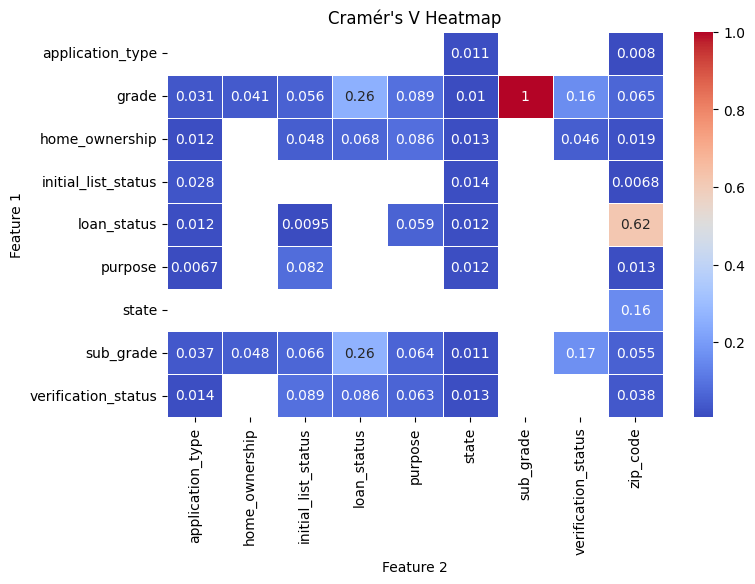

In [440]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Cramér\'s V Heatmap')
plt.show()

sub_grade and grade have high correlations so drop subgrade

In [441]:
final_ds = final_ds.drop(columns = ["sub_grade"], axis = 1)

Correlation Heatmap -continous_variables

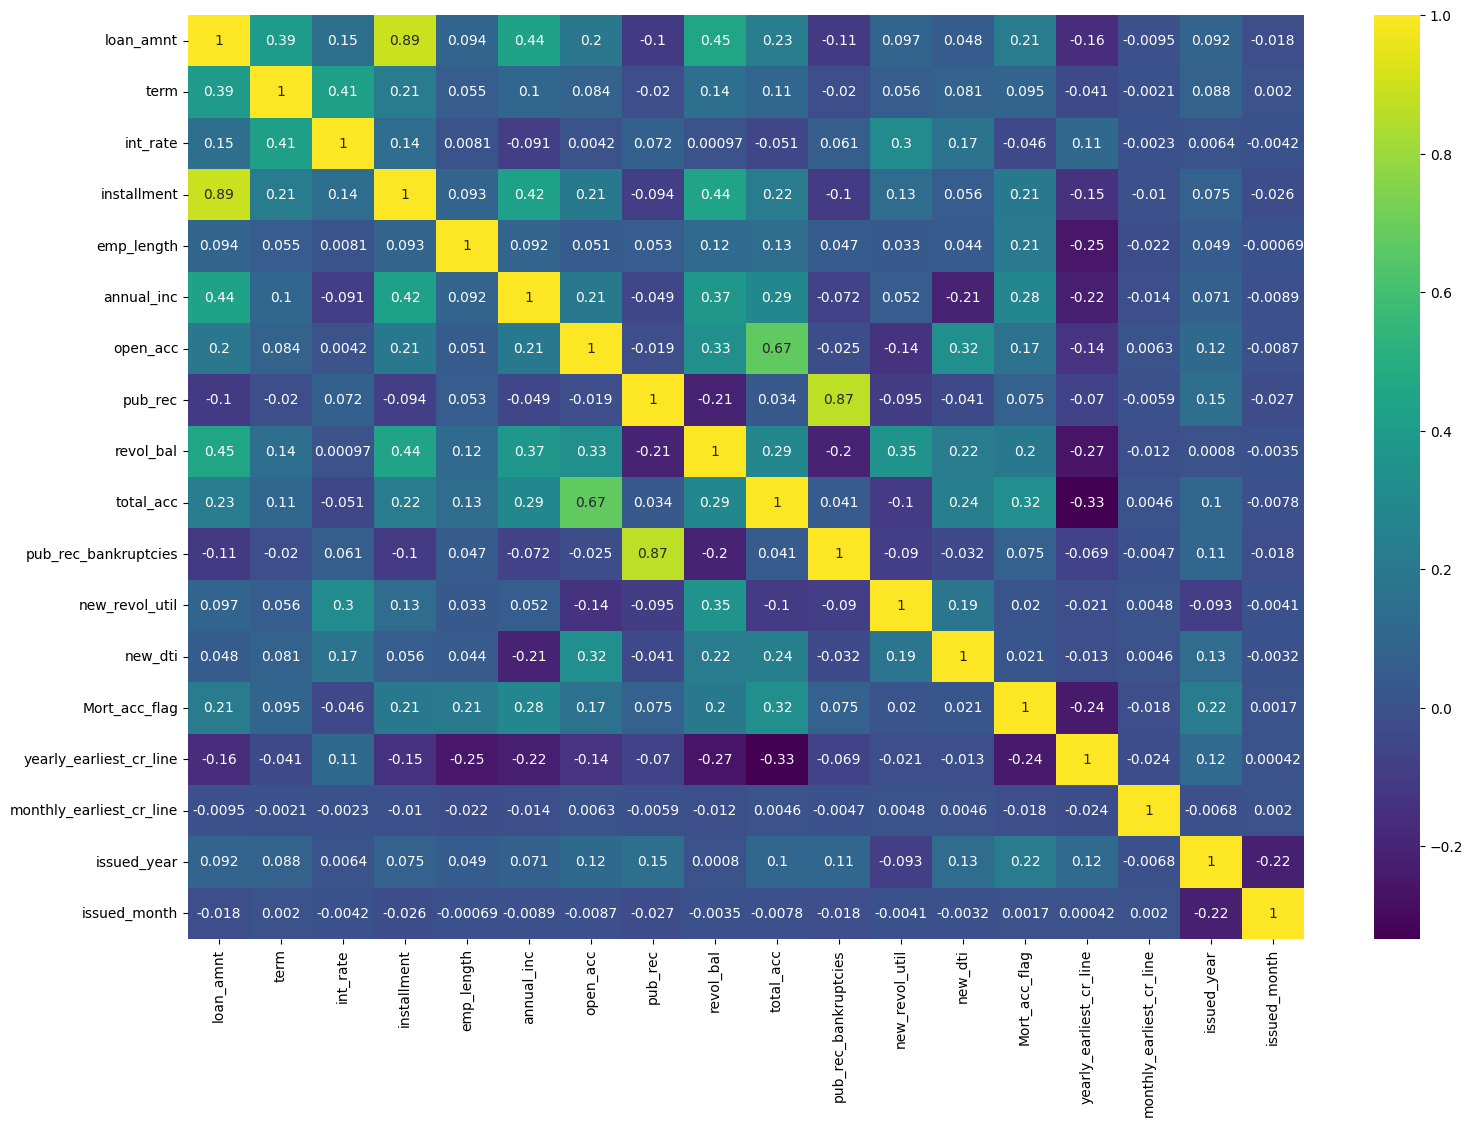

In [442]:

corr_check_dfs = final_ds.select_dtypes(include=['float', "int"])

plt.figure(figsize=(18, 12))
sns.heatmap(corr_check_dfs.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

installemnt and loan_amount have high correlations and pub_rec and pub_rec_bankruptcies have high correlations

In [443]:
final_ds.drop(columns = ["installment","pub_rec"], axis = 1, inplace = True)

split target variable loan_status from dataset

In [444]:
Y = final_ds["loan_status"]

In [445]:
print(type(Y))  

<class 'pandas.core.series.Series'>


In [446]:
pd.crosstab(final_ds["purpose"], Y)

loan_status,Charged Off,Fully Paid
purpose,,
car,630,4049
credit_card,13844,68939
debt_consolidation,48530,185287
educational,41,214
home_improvement,4076,19878
house,433,1765
major_purchase,1445,7322
medical,909,3275
moving,667,2174


In [447]:
pd.crosstab(final_ds["home_ownership"], Y)

loan_status,Charged Off,Fully Paid
home_ownership,,
ANY,0,3
MORTGAGE,33552,164136
NONE,7,24
OTHER,16,96
OWN,7799,29917
RENT,36122,123221


In [448]:
pd.crosstab(final_ds["home_ownership"], Y)

loan_status,Charged Off,Fully Paid
home_ownership,,
ANY,0,3
MORTGAGE,33552,164136
NONE,7,24
OTHER,16,96
OWN,7799,29917
RENT,36122,123221


data preparation for modeling

ordinal_encoding for grade feature

In [449]:
ordinal_encoding_features = ["grade"]

In [450]:
grade_order = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
ordinal_encoding = OrdinalEncoder(categories=grade_order)
final_ds["grade"] = ordinal_encoding.fit_transform(lt_1[["grade"]])


In [451]:
final_ds

,loan_amnt,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,new_revol_util,new_dti,Mort_acc_flag,yearly_earliest_cr_line,monthly_earliest_cr_line,issued_year,issued_month,city,state,zip_code
0,12000.0,36,11.44,1.0,Marketing,10.0,RENT,117000.0,Not Verified,Fully Paid,...,3.756538,3.304686,0,1990,6,2015,1,mendozaberg,ok,22690
1,12000.0,36,11.99,1.0,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,Fully Paid,...,3.994524,3.137666,1,2004,7,2015,1,loganmouth,sd,05113
2,15600.0,36,10.49,1.0,Statistician,0.5,RENT,64000.0,Source Verified,Fully Paid,...,4.534748,2.623944,0,2007,8,2015,1,new sabrina,wv,05113
3,12000.0,36,6.49,0.0,Client Advocate,6.0,RENT,64000.0,Not Verified,Fully Paid,...,3.113515,1.280934,0,2006,9,2014,11,delacruzside,ma,00813
4,24375.0,60,17.27,2.0,Destiny Management Inc.,9.0,MORTGAGE,64000.0,Verified,Charged Off,...,4.259859,3.553918,1,1999,3,2013,4,greggshire,va,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394888,12000.0,60,10.99,1.0,licensed bankere,2.0,RENT,64000.0,Source Verified,Fully Paid,...,3.563883,2.811208,0,2004,11,2015,10,johnnyville,dc,30723
394889,21000.0,36,12.29,2.0,Agent,5.0,MORTGAGE,110000.0,Source Verified,Fully Paid,...,4.571613,3.111291,1,2006,2,2015,2,rachelborough,la,05113
394890,12000.0,36,9.99,1.0,City Carrier,10.0,RENT,64000.0,Verified,Fully Paid,...,4.218036,2.921009,0,1997,3,2013,10,reedfort,ny,70466
394891,21000.0,60,15.31,2.0,"Gracon Services, Inc",10.0,MORTGAGE,64000.0,Verified,Fully Paid,...,4.003690,2.826129,1,1990,11,2012,8,new michael,fl,29597


In [452]:
final_ds.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
title                       0
open_acc                    0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
pub_rec_bankruptcies        0
new_revol_util              0
new_dti                     0
Mort_acc_flag               0
yearly_earliest_cr_line     0
monthly_earliest_cr_line    0
issued_year                 0
issued_month                0
city                        0
state                       0
zip_code                    0
dtype: int64

In [453]:
list_status = {'w': 0, 'f': 1}
final_ds['initial_list_status'] = final_ds.initial_list_status.map(list_status)

one hot encoding for features in below cell

In [454]:
one_hot_encoding_features = ["home_ownership","verification_status","application_type","purpose"]

In [455]:
final_ds = pd.get_dummies(final_ds, columns=one_hot_encoding_features , drop_first =  True)

target encoding for features below cell

In [456]:
#frequency_feature = ["emp_title","zip_code","state","title","city"]
#for i in frequency_feature:
  #  final_ds[f'{i}'] = final_ds[i].map(final_ds[i].value_counts(normalize = True))

In [457]:
final_ds["loan_status"] = final_ds["loan_status"].map({"Fully Paid" : 0 , "Charged Off" : 1})

For each category in 'category_feature', compute the mean of the 'target' variable

In [458]:

target_feature = ["emp_title","zip_code","state","title","city"]

# Map the target mean values back to the original feature in the dataset
for i in target_feature:
    target_mean_encoding = final_ds.groupby(i)['loan_status'].mean()
    final_ds[f'{i}'] = final_ds[i].map(target_mean_encoding)


In [459]:
Y = final_ds["loan_status"]

In [460]:
final_ds.isnull().sum()

loan_amnt                              0
term                                   0
int_rate                               0
grade                                  0
emp_title                              0
emp_length                             0
annual_inc                             0
loan_status                            0
title                                  0
open_acc                               0
revol_bal                              0
total_acc                              0
initial_list_status                    0
pub_rec_bankruptcies                   0
new_revol_util                         0
new_dti                                0
Mort_acc_flag                          0
yearly_earliest_cr_line                0
monthly_earliest_cr_line               0
issued_year                            0
issued_month                           0
city                                   0
state                                  0
zip_code                               0
home_ownership_M

In [461]:
len(final_ds.columns)

46

In [462]:
final_ds.head()

,loan_amnt,term,int_rate,grade,emp_title,emp_length,annual_inc,loan_status,title,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,12000.0,36,11.44,1.0,0.247191,10.0,117000.0,0,0.203940,16.0,...,False,False,False,False,False,False,False,False,True,False
1,12000.0,36,11.99,1.0,0.333333,4.0,65000.0,0,0.223343,17.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,1.0,0.181818,0.5,64000.0,0,0.192507,13.0,...,False,False,False,False,False,False,False,False,False,False
3,12000.0,36,6.49,0.0,0.000000,6.0,64000.0,0,0.192507,6.0,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,2.0,1.000000,9.0,64000.0,1,0.114616,13.0,...,False,False,False,False,False,False,False,False,False,False


In [463]:
final_ds.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
grade                                  float64
emp_title                              float64
emp_length                             float64
annual_inc                             float64
loan_status                              int64
title                                  float64
open_acc                               float64
revol_bal                              float64
total_acc                              float64
initial_list_status                      int64
pub_rec_bankruptcies                     int64
new_revol_util                         float64
new_dti                                float64
Mort_acc_flag                            int64
yearly_earliest_cr_line                  int32
monthly_earliest_cr_line                 int32
issued_year                              int32
issued_month                             int32
city         

In [464]:
Y

0         0
1         0
2         0
3         0
4         1
         ..
394888    0
394889    0
394890    0
394891    0
394892    0
Name: loan_status, Length: 394893, dtype: int64

In [465]:
final_ds = final_ds.drop("loan_status", axis = 1)

convert data types bool to int

In [466]:
def bools(final_ds):
    for i in final_ds.columns:
        if final_ds[i].dtypes == "bool":
            final_ds[i]= final_ds[i].astype("int")

In [467]:
bools(final_ds)

In [468]:
final_ds["home_ownership_MORTGAGE"].value_counts()

home_ownership_MORTGAGE
1    197688
0    197205
Name: count, dtype: int64

In [469]:
final_ds.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
grade                                  float64
emp_title                              float64
emp_length                             float64
annual_inc                             float64
title                                  float64
open_acc                               float64
revol_bal                              float64
total_acc                              float64
initial_list_status                      int64
pub_rec_bankruptcies                     int64
new_revol_util                         float64
new_dti                                float64
Mort_acc_flag                            int64
yearly_earliest_cr_line                  int32
monthly_earliest_cr_line                 int32
issued_year                              int32
issued_month                             int32
city                                   float64
state        

In [470]:
final_ds.head()

,loan_amnt,term,int_rate,grade,emp_title,emp_length,annual_inc,title,open_acc,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,12000.0,36,11.44,1.0,0.247191,10.0,117000.0,0.203940,16.0,36369.0,...,0,0,0,0,0,0,0,0,1,0
1,12000.0,36,11.99,1.0,0.333333,4.0,65000.0,0.223343,17.0,20131.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,1.0,0.181818,0.5,64000.0,0.192507,13.0,11987.0,...,0,0,0,0,0,0,0,0,0,0
3,12000.0,36,6.49,0.0,0.000000,6.0,64000.0,0.192507,6.0,11181.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,2.0,1.000000,9.0,64000.0,0.114616,13.0,24584.0,...,0,0,0,0,0,0,0,0,0,0


In [471]:
X = final_ds

Multicollinearity check using Variance Inflation Factor (VIF) 

In [472]:
def vif_calculation(X):
    vif_calc = pd.DataFrame()
    vif = pd.DataFrame(X,columns = X.columns)
    vif_calc["features"] = vif.columns
    vif_calc["values"] = [variance_inflation_factor(vif.values,i)for i in range(vif.shape[1])]
    vif_calc["values"] = round(vif_calc["values"],2)
    vif_calc = vif_calc.sort_values(by = "values", ascending = False)
    return vif_calc

In [473]:
vif_result = vif_calculation(X)
print(vif_result)

                               features     values
18                          issued_year  225318.05
16              yearly_earliest_cr_line   97385.39
23              home_ownership_MORTGAGE   63016.13
27                  home_ownership_RENT   50816.60
26                   home_ownership_OWN   12028.57
21                                state    1721.49
30          application_type_INDIVIDUAL    1384.17
2                              int_rate     118.61
33           purpose_debt_consolidation      52.04
13                       new_revol_util      39.90
14                              new_dti      37.67
25                 home_ownership_OTHER      36.61
3                                 grade      32.69
1                                  term      26.09
32                  purpose_credit_card      19.05
6                            annual_inc      17.78
0                             loan_amnt      14.73
10                            total_acc      12.21
8                              

In [474]:

print(X[['pub_rec_bankruptcies']].describe())

       pub_rec_bankruptcies
count         394893.000000
mean               0.113978
std                0.317785
min                0.000000
25%                0.000000
50%                0.000000
75%                0.000000
max                1.000000


In [475]:
X["home_ownership_MORTGAGE"]

0         0
1         1
2         0
3         0
4         1
         ..
394888    0
394889    1
394890    0
394891    1
394892    0
Name: home_ownership_MORTGAGE, Length: 394893, dtype: int32

In [476]:
def drop_col(X,columns):
    X = X.drop(columns,axis = 1)
    return X

VIF score is more then 10 we have drop that features

In [477]:
X = drop_col(X,["issued_year"])

In [478]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'annual_inc', 'title', 'open_acc', 'revol_bal', 'total_acc',
       'initial_list_status', 'pub_rec_bankruptcies', 'new_revol_util',
       'new_dti', 'Mort_acc_flag', 'yearly_earliest_cr_line',
       'monthly_earliest_cr_line', 'issued_month', 'city', 'state', 'zip_code',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [479]:
len(X.columns)

44

In [480]:
vif_cal_1 = vif_calculation(X)
print(vif_cal_1)

                               features    values
16              yearly_earliest_cr_line  55601.44
22              home_ownership_MORTGAGE  28301.40
26                  home_ownership_RENT  22821.81
25                   home_ownership_OWN   5395.45
20                                state   1709.72
29          application_type_INDIVIDUAL   1378.15
2                              int_rate    118.48
32           purpose_debt_consolidation     52.00
13                       new_revol_util     39.89
14                              new_dti     37.64
3                                 grade     32.68
1                                  term     26.08
31                  purpose_credit_card     19.04
6                            annual_inc     17.76
24                 home_ownership_OTHER     16.99
0                             loan_amnt     14.73
8                              open_acc     12.13
10                            total_acc     12.06
9                             revol_bal      7.80


In [481]:
X = drop_col(X,["yearly_earliest_cr_line"])
#,"int_rate","grade   "]

In [482]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'annual_inc', 'title', 'open_acc', 'revol_bal', 'total_acc',
       'initial_list_status', 'pub_rec_bankruptcies', 'new_revol_util',
       'new_dti', 'Mort_acc_flag', 'monthly_earliest_cr_line', 'issued_month',
       'city', 'state', 'zip_code', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [483]:
len(X.columns)

43

In [484]:
vif_calc_2 = vif_calculation(X)
print(vif_calc_2)

                               features   values
19                                state  1700.76
21              home_ownership_MORTGAGE  1614.56
28          application_type_INDIVIDUAL  1372.30
25                  home_ownership_RENT  1299.54
24                   home_ownership_OWN   308.26
2                              int_rate   118.43
31           purpose_debt_consolidation    51.99
13                       new_revol_util    39.89
14                              new_dti    37.62
3                                 grade    32.68
1                                  term    26.08
30                  purpose_credit_card    19.04
6                            annual_inc    17.76
0                             loan_amnt    14.73
8                              open_acc    12.08
10                            total_acc    11.80
9                             revol_bal     7.68
33             purpose_home_improvement     6.19
38                        purpose_other     5.59
16             month

In [485]:
X = drop_col(X,["state"])

In [486]:
vif_calc_3 = vif_calculation(X)
print(vif_calc_3)

                               features   values
27          application_type_INDIVIDUAL  1372.10
20              home_ownership_MORTGAGE   787.95
24                  home_ownership_RENT   633.10
23                   home_ownership_OWN   150.53
2                              int_rate   118.43
30           purpose_debt_consolidation    51.99
13                       new_revol_util    39.89
14                              new_dti    37.62
3                                 grade    32.68
1                                  term    26.08
29                  purpose_credit_card    19.03
6                            annual_inc    17.76
0                             loan_amnt    14.73
8                              open_acc    12.07
10                            total_acc    11.80
9                             revol_bal     7.68
32             purpose_home_improvement     6.19
37                        purpose_other     5.59
16             monthly_earliest_cr_line     4.87
17                  

In [487]:
X = drop_col(X,["application_type_INDIVIDUAL"])

In [488]:
len(X.columns)

41

In [489]:
len(X.columns)

41

In [490]:
vif_calc_4 = vif_calculation(X)
print(vif_calc_4)

                               features  values
2                              int_rate  118.41
20              home_ownership_MORTGAGE   99.70
24                  home_ownership_RENT   78.32
29           purpose_debt_consolidation   51.99
13                       new_revol_util   39.88
14                              new_dti   37.57
3                                 grade   32.68
1                                  term   26.07
23                   home_ownership_OWN   19.27
28                  purpose_credit_card   19.03
6                            annual_inc   17.76
0                             loan_amnt   14.73
8                              open_acc   12.07
10                            total_acc   11.80
9                             revol_bal    7.68
31             purpose_home_improvement    6.19
36                        purpose_other    5.59
16             monthly_earliest_cr_line    4.87
17                         issued_month    4.67
7                                 title 

In [491]:
X = drop_col(X,["int_rate"])

In [492]:
len(X.columns)

40

In [493]:
vif_calc_5 = vif_calculation(X)
print(vif_calc_5)

                               features  values
19              home_ownership_MORTGAGE   88.55
23                  home_ownership_RENT   68.83
28           purpose_debt_consolidation   51.98
12                       new_revol_util   38.97
13                              new_dti   37.57
1                                  term   26.05
27                  purpose_credit_card   19.03
5                            annual_inc   17.71
22                   home_ownership_OWN   17.07
0                             loan_amnt   14.71
7                              open_acc   12.06
9                             total_acc   11.78
8                             revol_bal    7.66
30             purpose_home_improvement    6.19
35                        purpose_other    5.58
15             monthly_earliest_cr_line    4.87
16                         issued_month    4.67
2                                 grade    4.50
6                                 title    4.22
4                            emp_length 

In [494]:
X = drop_col(X,["home_ownership_MORTGAGE"])

In [495]:
len(X.columns)

39

In [496]:
vif_calc_6 = vif_calculation(X)
print(vif_calc_6)

                               features  values
12                       new_revol_util   35.31
13                              new_dti   34.00
27           purpose_debt_consolidation   31.90
1                                  term   23.31
5                            annual_inc   16.29
0                             loan_amnt   14.71
7                              open_acc   12.03
26                  purpose_credit_card   11.93
9                             total_acc   11.78
8                             revol_bal    7.50
15             monthly_earliest_cr_line    4.77
16                         issued_month    4.57
2                                 grade    4.31
6                                 title    4.20
4                            emp_length    4.11
14                        Mort_acc_flag    3.90
29             purpose_home_improvement    3.88
34                        purpose_other    3.54
22                  home_ownership_RENT    2.90
17                                 city 

In [497]:
X = drop_col(X,["new_revol_util"])

In [498]:
len(X.columns)

38

In [499]:
vif_calc_7 = vif_calculation(X)
print(vif_calc_7)

                               features  values
12                              new_dti   29.61
26           purpose_debt_consolidation   28.08
1                                  term   23.29
5                            annual_inc   15.88
0                             loan_amnt   14.65
7                              open_acc   11.84
9                             total_acc   11.74
25                  purpose_credit_card   10.37
8                             revol_bal    7.21
14             monthly_earliest_cr_line    4.75
15                         issued_month    4.56
6                                 title    4.20
2                                 grade    4.15
4                            emp_length    4.11
13                        Mort_acc_flag    3.89
28             purpose_home_improvement    3.61
33                        purpose_other    3.29
21                  home_ownership_RENT    2.89
16                                 city    2.73
10                  initial_list_status 

In [500]:
X = drop_col(X,["new_dti"])

In [501]:
len(X.columns)

37

In [502]:
vif_calc_8 = vif_calculation(X)
print(vif_calc_8)

                               features  values
1                                  term   22.98
25           purpose_debt_consolidation   21.17
5                            annual_inc   15.22
0                             loan_amnt   14.64
9                             total_acc   11.66
7                              open_acc   11.41
24                  purpose_credit_card    7.93
8                             revol_bal    6.92
13             monthly_earliest_cr_line    4.73
14                         issued_month    4.54
6                                 title    4.19
2                                 grade    4.13
4                            emp_length    4.09
12                        Mort_acc_flag    3.88
27             purpose_home_improvement    3.02
20                  home_ownership_RENT    2.85
32                        purpose_other    2.75
15                                 city    2.73
10                  initial_list_status    2.55
22         verification_status_Verified 

In [503]:
X = drop_col(X,["term"])

In [504]:
len(X.columns)

36

In [505]:
vif_calc_9 = vif_calculation(X)
print(vif_calc_9)

                               features  values
24           purpose_debt_consolidation   18.14
4                            annual_inc   15.21
0                             loan_amnt   13.73
8                             total_acc   11.61
6                              open_acc   11.41
7                             revol_bal    6.92
23                  purpose_credit_card    6.82
12             monthly_earliest_cr_line    4.71
13                         issued_month    4.52
5                                 title    4.19
3                            emp_length    4.08
11                        Mort_acc_flag    3.88
1                                 grade    3.45
19                  home_ownership_RENT    2.85
14                                 city    2.73
26             purpose_home_improvement    2.69
9                   initial_list_status    2.54
31                        purpose_other    2.52
21         verification_status_Verified    2.45
20  verification_status_Source Verified 

In [506]:
X = drop_col(X,["purpose_debt_consolidation"])

In [507]:
len(X.columns)

35

In [508]:
vif_calc_10 = vif_calculation(X)
print(vif_calc_10)

                               features  values
4                            annual_inc   14.12
0                             loan_amnt   13.41
8                             total_acc   11.60
6                              open_acc   11.17
7                             revol_bal    6.92
12             monthly_earliest_cr_line    4.38
13                         issued_month    4.22
5                                 title    4.01
3                            emp_length    3.88
11                        Mort_acc_flag    3.76
1                                 grade    3.41
14                                 city    2.70
19                  home_ownership_RENT    2.55
21         verification_status_Verified    2.45
9                   initial_list_status    2.41
20  verification_status_Source Verified    2.18
15                             zip_code    2.07
2                             emp_title    2.07
23                  purpose_credit_card    1.37
18                   home_ownership_OWN 

If the VIF score is more than 10, it indicates high collinearity, so we should remove those columns. However, if the columns are important for the dataset, we should keep them or create new features using those columns. For example, since 'annual_inc' has a VIF score of 14 and 'loan_amount' has a score of 13, both are important for the loan dataset, so I will keep these features.

In [509]:
len(X.columns)

35

In [510]:
X

,loan_amnt,grade,emp_title,emp_length,annual_inc,title,open_acc,revol_bal,total_acc,initial_list_status,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,12000.0,1.0,0.247191,10.0,117000.0,0.203940,16.0,36369.0,25.0,0,...,0,0,0,0,0,0,0,0,1,0
1,12000.0,1.0,0.333333,4.0,65000.0,0.223343,17.0,20131.0,27.0,1,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,1.0,0.181818,0.5,64000.0,0.192507,13.0,11987.0,26.0,1,...,0,0,0,0,0,0,0,0,0,0
3,12000.0,0.0,0.000000,6.0,64000.0,0.192507,6.0,11181.0,13.0,1,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,2.0,1.000000,9.0,64000.0,0.114616,13.0,24584.0,43.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394888,12000.0,1.0,0.000000,2.0,64000.0,0.223343,6.0,11181.0,23.0,0,...,0,0,0,0,0,0,0,0,0,0
394889,21000.0,2.0,0.226316,5.0,110000.0,0.223343,6.0,41064.8,8.0,1,...,0,0,0,0,0,0,0,0,0,0
394890,12000.0,1.0,0.268657,10.0,64000.0,0.159520,15.0,32704.0,23.0,1,...,0,0,0,0,0,0,0,0,0,0
394891,21000.0,2.0,0.000000,10.0,64000.0,0.000000,9.0,15704.0,20.0,1,...,0,0,0,0,0,0,0,0,0,0


In [511]:
Y

0         0
1         0
2         0
3         0
4         1
         ..
394888    0
394889    0
394890    0
394891    0
394892    0
Name: loan_status, Length: 394893, dtype: int64

In [512]:
Y[Y == 1].sum()

77496

In [513]:
Y[Y == 0].count()

317397

Data Preparation for Modeling -


Split the dataset into training, validation, and testing sets.

In [514]:
X_train_val,X_test,Y_train_val,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [515]:
len(X_test)

78979

In [516]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val, random_state = 42, test_size = 0.25)

Standard Scaler

This process preserves the shape of the original distribution, meaning it doesn't change the relationships between the data points or the underlying patterns in the data.

In [517]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.transform(X_val)
X_test_scaler = scaler.transform(X_test)

In [518]:
len(X_val_scaler)

78979

In [519]:
X_train_scaler

array([[-0.70681132,  2.38405738, -0.74557956, ..., -0.12085792,
        -0.07895834, -0.06788888],
       [ 0.64632376, -1.36841642,  0.16694904, ..., -0.12085792,
        -0.07895834, -0.06788888],
       [ 1.49203319,  0.1325731 , -0.74557956, ..., -0.12085792,
        -0.07895834, -0.06788888],
       ...,
       [-0.19938567, -1.36841642,  0.29806292, ..., -0.12085792,
        -0.07895834, -0.06788888],
       [-0.70681132, -0.61792166, -0.74557956, ..., -0.12085792,
        -0.07895834, -0.06788888],
       [ 2.50265595,  0.1325731 , -0.74557956, ..., -0.12085792,
        -0.07895834, -0.06788888]])

In [520]:
print(type(Y_train))

<class 'pandas.core.series.Series'>


In [521]:
print(Y_train.unique())

[0 1]


Logistic Regression model

In [522]:
model = LogisticRegression()
model.fit(X_train_scaler,Y_train)

LogisticRegression()

In [523]:
Y_train.count()

236935

In [524]:
coef = model.coef_
print(coef)

[[ 8.22506721e-02  5.67000750e-01  2.30019001e+00 -9.87492183e-03
  -7.24758772e-02  9.95773828e-01  1.14388591e-01  3.08735574e-02
  -5.21171749e-02 -2.75625460e-03 -3.43316310e-02 -2.78641510e-02
  -5.62433716e-03 -2.20198888e-02  1.09447300e+00  4.11281115e+00
  -2.47448738e-02 -4.71793984e-02  4.63546128e-02  1.28781374e-01
   1.26025758e-01  1.38712951e-01 -1.63619402e-02  1.05655252e-01
  -5.24094366e-03  4.66400926e-02 -3.59117426e-02 -5.96058173e-03
  -1.93345584e-03 -3.53949623e-02 -7.68756027e-02  4.28733280e-03
  -9.55339780e-02 -9.14343653e-03 -3.41856729e-03]]


In [525]:
intercept = model.intercept_
print(intercept)

[-2.30202633]


In [526]:
Y_val

142523    0
310100    0
1289      0
349619    1
82438     0
         ..
138606    0
71173     0
144940    0
9085      0
301211    0
Name: loan_status, Length: 78979, dtype: int64

In [527]:
X_train_scaler.shape

(236935, 35)

In [528]:
print(type(Y_val))

<class 'pandas.core.series.Series'>


In [529]:
Y_val.shape

(78979,)

predict validation data

In [530]:
y_pred = model.predict(X_val_scaler)

form for score

In [531]:
np.mean((y_pred == Y_val))

0.9413894832803656

In [532]:
Y_val.value_counts()

loan_status
0    63407
1    15572
Name: count, dtype: int64

X_val score

In [533]:
model.score(X_val_scaler, Y_val)

0.9413894832803656

X_train score

In [534]:
model.score(X_train_scaler,Y_train)

0.942169793403254

Confusion Matrix -

In [535]:
confusion_matrix = confusion_matrix(Y_val, y_pred)

In [536]:
print(confusion_matrix)

[[62343  1064]
 [ 3565 12007]]


precision_score

In [537]:
precision_score(Y_val,y_pred)

0.9185984239920435

accuracy_score

In [538]:
accuracy_score(Y_val,y_pred)

0.9413894832803656

recall_score

In [539]:
recall_score(Y_val,y_pred)

0.7710634472129463

f1_score

In [540]:
f1_score(Y_val,y_pred)

0.8383898334671647

Classification Report -

In [541]:
classification_report = classification_report(Y_val,y_pred)

In [542]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     63407
           1       0.92      0.77      0.84     15572

    accuracy                           0.94     78979
   macro avg       0.93      0.88      0.90     78979
weighted avg       0.94      0.94      0.94     78979



In [543]:
Y_val.shape

(78979,)

Predict_Probabilities

In [544]:
prob = model.predict_proba(X_val_scaler)[:,1]

checking roc_auc_score   AUC(Area under the ROC Curve) 

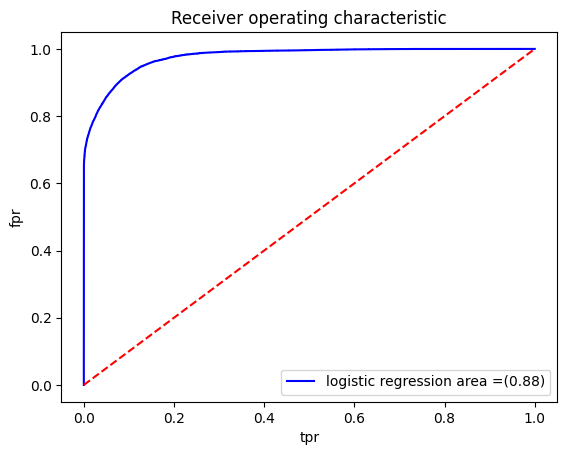

In [545]:
roc_plt = roc_auc_score(Y_val,y_pred)
tpr,fpr,threshold = roc_curve(Y_val,prob)
plt.plot(tpr,fpr,c = "blue", label = "logistic regression area =(%0.2f)"% roc_plt)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc = "lower right")
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.title('Receiver operating characteristic')
plt.show()

precision_recall_curve

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_11032\1998472326.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


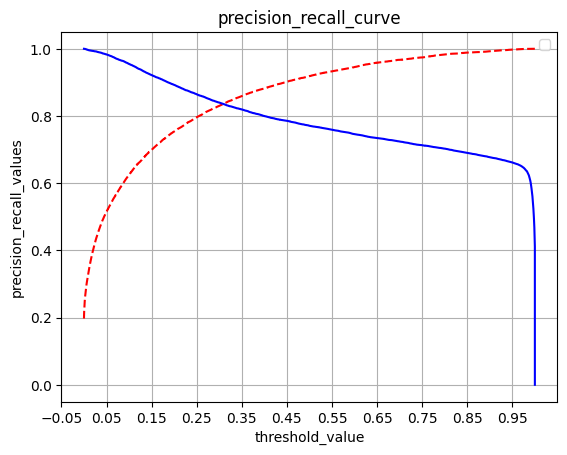

In [546]:
precision, recall, thresholds = precision_recall_curve(Y_val, prob)
threshold_len = threshold.shape[0]
plt.plot(thresholds, precision[:-1],linestyle = "--", c = "r")
plt.plot(thresholds, recall[:-1], c= "blue")
plt.ylabel("precision_recall_values")
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlabel("threshold_value")
plt.grid()
plt.legend()
plt.title("precision_recall_curve")
plt.show()

threshold : 0.30 give best precision and recall values

In [547]:
threshold.shape[0]

6644

In [548]:
#print(type(Y_train_res))

In [549]:
Y_test.shape

(78979,)

In [550]:
print(X_train_scaler.shape)  # Should be (n_samples, n_features)
print(Y_train.shape)  # Should be (n_samples,)


(236935, 35)
(236935,)


In [551]:
print(type(Y_train))

<class 'pandas.core.series.Series'>


In [552]:
Y_train.value_counts()

loan_status
0    190382
1     46553
Name: count, dtype: int64

hyperparameter tuning

using Grid search cv

In [553]:
param_grid = {'C': np.logspace(-4, 4, 20)}
#scoring
lr =LogisticRegression(penalty = "l2", class_weight = "balanced")
GS =  GridSearchCV(estimator = lr, param_grid= param_grid, cv =5,scoring = 'f1', error_score='raise',n_jobs=1)
GS.fit(X_train_scaler,Y_train)

Best_Params =  GS.best_params_
best_model = GS.best_estimator_

print(f"Best Parameters: {Best_Params}")
print(f"Best estimator: {best_model}")
print(best_model)

y_pred_best = best_model.predict(X_val_scaler)

print(f"accuracy: {accuracy_score(Y_val,y_pred_best)}")
precision = precision_score(Y_val, y_pred_best)
recall = recall_score(Y_val, y_pred_best) 
f1 = f1_score(Y_val, y_pred_best)

Best Parameters: {'C': 0.0001}
Best estimator: LogisticRegression(C=0.0001, class_weight='balanced')
LogisticRegression(C=0.0001, class_weight='balanced')
accuracy: 0.9310576229124198


F1_score

In [554]:
print(f1)

0.8265205339790359


X_train score

In [555]:
best_model.score(X_train_scaler,Y_train)

0.932416063477325

X_val score

In [556]:
best_model.score(X_val_scaler,Y_val)

0.9310576229124198

In [559]:
conf_matrix = confusion_matrix(Y_val, y_pred_best)
class_report = classification_report(Y_val, y_pred_best)

finding best threshold for F1 score

In [560]:
y_pred_proba = best_model.predict_proba(X_val_scaler)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.1)
F1= []
for t in thresholds:
    y_pred_adjusted = (y_pred_proba >= t).astype(int)
    current_score = f1_score(Y_val, y_pred_adjusted)
    #print(f"Threshold: {t}, F1 Score: {f1_score(Y_val, y_pred_adjusted)}")
    F1.append(current_score)
best_threshold = thresholds[np.argmax(F1)]
best_F1 = max(F1)

print("best_threshold :", best_threshold)
print("best_F1 :", best_F1)

best_threshold : 0.6
best_F1 : 0.83515261072099


finding best threshold for precision score

In [561]:
y_pred_proba = best_model.predict_proba(X_val_scaler)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.1)
precision= []
for t in thresholds:
    y_pred_adjusted = (y_pred_proba >= t).astype(int)
    current_score = precision_score(Y_val, y_pred_adjusted)
    
    #print(f"Threshold: {t}, F1 Score: {f1_score(Y_val, y_pred_adjusted)}")
    precision.append(current_score)
best_threshold = thresholds[np.argmax(precision)]
best_precision = max(precision)

print("best_threshold :", best_threshold)
print("best_precision :", best_precision)

best_threshold : 0.8
best_precision : 0.9893409954583372


Create a visualization to identify the best thresholds for maximizing both F1 score and precision.

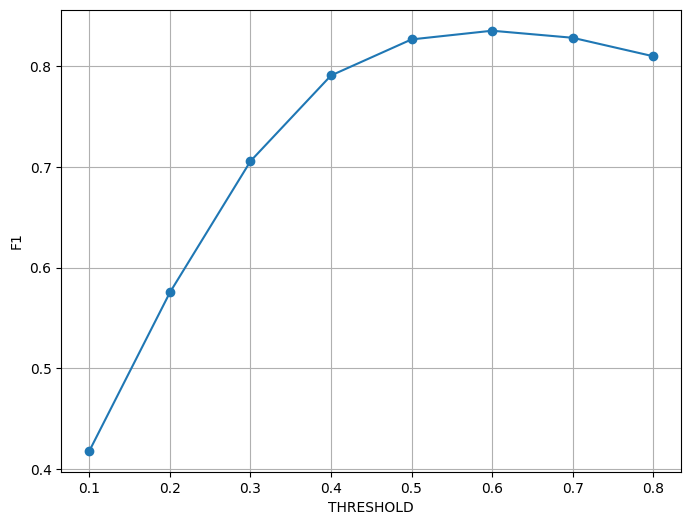

In [562]:
plt.figure(figsize = (8,6))
plt.plot(thresholds,F1, "-o",label = "f1")
#plt.plot(c_values,val_scores,"-o",label = "val")
#plt.xscale("log")
#plt.xticks(PARAMS)
#plt.legend(loc ="lower right")
plt.xlabel("THRESHOLD")
plt.ylabel("F1")
plt.grid()
plt.show()

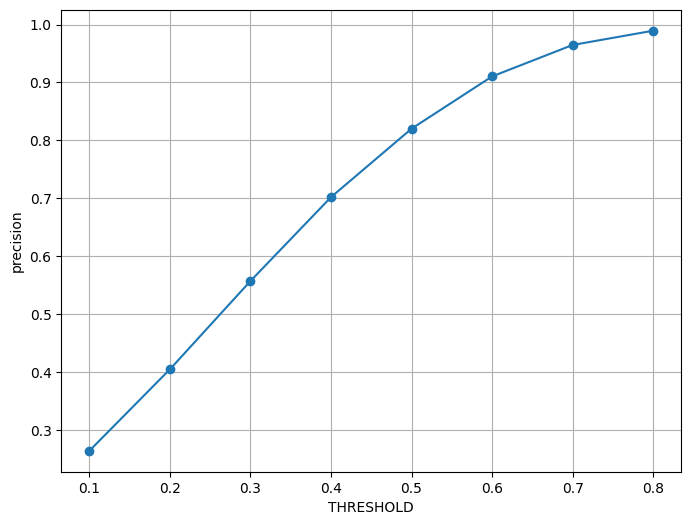

In [563]:
plt.figure(figsize = (8,6))
plt.plot(thresholds,precision, "-o",label = "f1")
#plt.plot(c_values,val_scores,"-o",label = "val")
#plt.xscale("log")
#plt.xticks(PARAMS)
#plt.legend(loc ="lower right")
plt.xlabel("THRESHOLD")
plt.ylabel("precision")
plt.grid()
plt.show()

confusion matrix

In [564]:
print(conf_matrix)

[[60563  2844]
 [ 2601 12971]]


classification reports

In [565]:
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     63407
           1       0.82      0.83      0.83     15572

    accuracy                           0.93     78979
   macro avg       0.89      0.89      0.89     78979
weighted avg       0.93      0.93      0.93     78979



creating final model

best C = 0.0001

In [566]:
final_model = LogisticRegression(C = 0.0001, n_jobs = -1, penalty = "l2", class_weight = "balanced")
final_model.fit(X_train_scaler,Y_train)
pred_v = final_model.predict(X_val_scaler)

#pred_t = models.predict(X_train)
print("train_score",final_model.score(X_train_scaler,Y_train))
print("val_score",final_model.score(X_val_scaler,Y_val))

train_score 0.932416063477325
val_score 0.9310576229124198


In [567]:
Y_train.shape

(236935,)

confusion matrix

In [568]:
conf_mat = confusion_matrix(Y_val,pred_v)

In [569]:
print("confusion_matrixs\n",conf_mat)

confusion_matrixs
 [[60563  2844]
 [ 2601 12971]]


precision score

In [570]:
precision_score(Y_val,pred_v)

0.8201707239962062

recall score

In [571]:
recall_score(Y_val,pred_v)

0.8329694323144105

F1 score

In [572]:
f1_score(Y_val,pred_v)

0.8265205339790359

classification_report

In [573]:
classification_reports = classification_report(Y_val,pred_v)

In [574]:
print(classification_reports)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     63407
           1       0.82      0.83      0.83     15572

    accuracy                           0.93     78979
   macro avg       0.89      0.89      0.89     78979
weighted avg       0.93      0.93      0.93     78979



In [575]:
proba_1 = final_model.predict_proba(X_val_scaler)[:,1]

In [576]:
proba_1

array([0.03662269, 0.08876851, 0.24264317, ..., 0.24747856, 0.06821474,
       0.13469421])

Evaluating the final model's performance on unseen test data

In [577]:
final_model.fit(X_train_scaler,Y_train)
pred_fin = final_model.predict(X_test_scaler)

#pred_t = models.predict(X_train)
print("train_score",final_model.score(X_train_scaler,Y_train))
print("test_score",final_model.score(X_test_scaler,Y_test))

train_score 0.932416063477325
test_score 0.932577014143


confusion matrix

In [578]:
conf_matrs = confusion_matrix(Y_test,pred_fin)
print("confusion_matrixs\n",conf_matrs)

confusion_matrixs
 [[60913  2695]
 [ 2630 12741]]


precision_score

In [579]:
precision_score(Y_test,pred_fin)

0.8254081368230112

f1_score

In [580]:
f1_score(Y_test,pred_fin)

0.8271496737754407

Classification_reports

In [581]:
Classification_reports = classification_report(Y_test,pred_fin)

In [582]:
print(Classification_reports)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     63608
           1       0.83      0.83      0.83     15371

    accuracy                           0.93     78979
   macro avg       0.89      0.89      0.89     78979
weighted avg       0.93      0.93      0.93     78979



In [583]:
probs = final_model.predict_proba(X_test_scaler)[:,1]

checking roc_auc_score

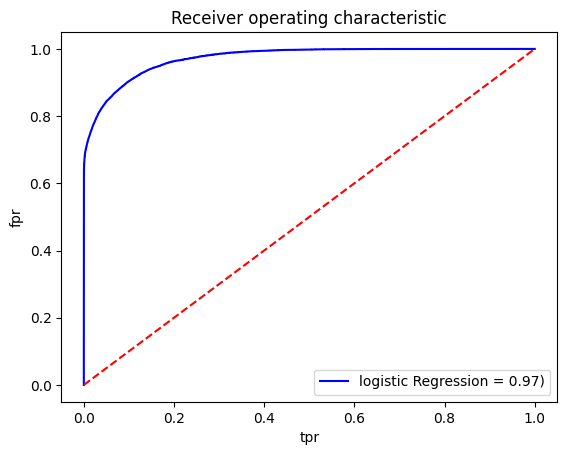

In [584]:
roc_plt_1 = roc_auc_score(Y_test,probs)
tpr, fpr ,threshold = roc_curve(Y_test,probs)
plt.plot(tpr,fpr, c = "blue", label = "logistic Regression = %0.2f)"% roc_plt_1)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc = "lower right")
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.title('Receiver operating characteristic')
plt.show()

In [585]:
recall, precision, thresholD = precision_recall_curve(Y_test,probs)
f1_scoreD = 2 *(recall * precision)/(recall+precision)
best_score_idx = np.argmax(f1_scoreD)
best_thresholD = thresholD[best_score_idx]
print(f"best_threshold:{best_thresholD}")
print(f"best_f1_score:{f1_scoreD[best_score_idx]}")


best_threshold:0.5594941606509132
best_f1_score:0.8326869615952225


In [586]:
recall, precision, threshold = precision_recall_curve(Y_test,probs)
best_score_idxs = np.argmax(precision)
best_thresholds = threshold[best_score_idxs]
print(f"best_threshold:{best_thresholds}")
print(f"best_precision_score:{precision[best_score_idxs]}")

best_threshold:0.008767389162455069
best_precision_score:1.0


Create a visualization to identify the optimal thresholds for maximizing both F1 score and precision on unseen data.

Determining the optimal threshold for achieving the best precision score and F1 score on unseen da

In [587]:

thresholds = np.arange(0.1, 0.9, 0.1)
precisions= []
for t in thresholds:
    Y_pred_adjusted = (probs >= t).astype(int)
    current_scores = precision_score(Y_test, Y_pred_adjusted)
    
    #print(f"Threshold: {t}, F1 Score: {f1_score(Y_val, y_pred_adjusted)}")
    precisions.append(current_scores)
best_threshold = thresholds[np.argmax(precisions)]
best_precision = max(precisions)

print("best_threshold :", best_threshold)
print("best_precision :", best_precision)

best_threshold : 0.8
best_precision : 0.9908907853101927


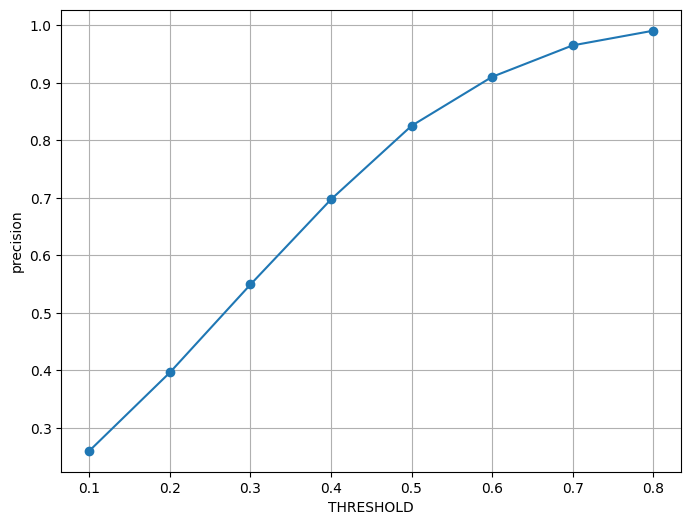

In [588]:
plt.figure(figsize = (8,6))
plt.plot(thresholds,precisions, "-o",label = "precision")
#plt.plot(c_values,val_scores,"-o",label = "val")
#plt.xscale("log")
#plt.xticks(PARAMS)
#plt.legend(loc ="lower right")
plt.xlabel("THRESHOLD")
plt.ylabel("precision")
plt.grid()
plt.show()

for precision 0.6 is the best threshold it reduce the false positive

Determining the optimal threshold for achieving the best F1 score on unseen da

In [589]:

thresholds = np.arange(0.1, 0.9, 0.1)
F1_= []
for t in thresholds:
    Y_pred_adjusted = (probs >= t).astype(int)
    current_scores = f1_score(Y_test, Y_pred_adjusted)
    
    #print(f"Threshold: {t}, F1 Score: {f1_score(Y_val, y_pred_adjusted)}")
    F1_.append(current_scores)
best_threshold = thresholds[np.argmax(F1_)]
best_F1 = max(F1_)

print("best_threshold :", best_threshold)
print("best_F1 :", best_F1)

best_threshold : 0.6
best_F1 : 0.8303542986585496


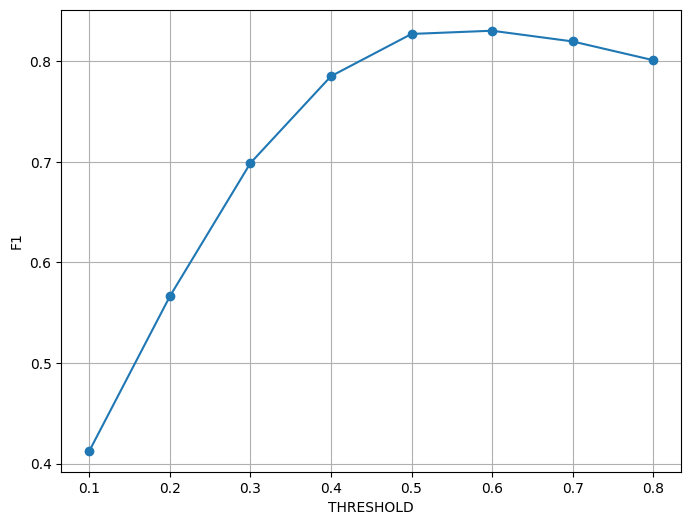

In [590]:
plt.figure(figsize = (8,6))
plt.plot(thresholds,F1_, "-o",label = "f1")
#plt.plot(c_values,val_scores,"-o",label = "val")
#plt.xscale("log")
#plt.xticks(PARAMS)
#plt.legend(loc ="lower right")
plt.xlabel("THRESHOLD")
plt.ylabel("F1")
plt.grid()
plt.show()

precision_recall_curve

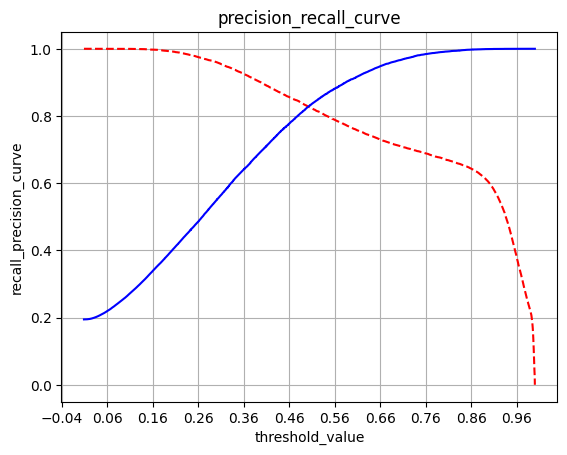

In [599]:
recall, precision, threshold= precision_recall_curve(Y_test,probs)
plt.plot(threshold,precision[:-1],linestyle = "--",c = "r")
plt.plot(threshold,recall[:-1],c = "blue")
start,end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlabel("threshold_value")
plt.ylabel("recall_precision_curve")
plt.title("precision_recall_curve")
plt.grid()
plt.show()
    


threshold : 0.50 give best precision recall values

Final Model Evaluation: Confusion Matrix and Metrics at 0.6 Threshold

In [592]:
probs

array([0.20524624, 0.01968367, 0.63077024, ..., 0.17045098, 0.26676718,
       0.32839564])

In [593]:
threshold = 0.6
y_pred_fin = (probs >= threshold).astype(int)
cm = confusion_matrix(Y_test, y_pred_fin)
print("Confusion Matrix:\n", cm)
precision_fin = precision_score(Y_test, y_pred_fin)
recalls_fin = recall_score(Y_test, y_pred_fin)
f1_fin = f1_score(Y_test, y_pred_fin)
accuracy_fin = (cm[0, 0] + cm[1, 1]) / np.sum(cm)


Confusion Matrix:
 [[62456  1152]
 [ 3641 11730]]


In [594]:
y_pred_fin

array([0, 0, 1, ..., 0, 0, 0])

In [595]:
print("precision :",precision_fin)

precision : 0.9105728924080112



By adjusting the decision threshold from 0.5 to 0.6, the model's ability to correctly identify fully paid loans improved significantly, making it more conservative in its predictions. This change is beneficial if the objective is to minimize the risk of misclassifying charged-off loans as fully paid.

In [596]:
print("F1_score:",f1_fin)

F1_score: 0.8303542986585496


In [597]:
print("recall_score:",recalls_fin)

recall_score: 0.7631253659488647


In [598]:
print("accuracy_score:",accuracy_fin)

accuracy_score: 0.9393129819319059


final model metrics score (threshold : 0.6)

precision : 0.9105728924080112

F1_score: 0.8303542986585496

accuracy_score: 0.9393129819319059

recall_score: 0.7631253659488647

This report presents the analysis of a Logistic Regression model developed for LoanTap, aimed at predicting loan statuses as either "fully paid" or "charged off." Given the financial implications of these classifications, accurate predictions are crucial for effective risk management and decision-making.

The primary objective of this analysis is to evaluate the model's performance based on various metrics and thresholds, ensuring it meets LoanTap's business requirements for precision , FL score and accuracy in loan status prediction.

Dataset: LoanTap loan data, including various features such as loan amount, annual income, account type, etc.

Target Variable: Loan status (1 = fully paid, 0 = charged off).

Model Development
Logistic Regression Model
Algorithm: Logistic Regression

 Model Evaluation Metrics

Confusion Matrix: Provides counts of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

Precision: Measures the accuracy of positive predictions.

F1 Score: The harmonic mean of precision and recall.

Accuracy: The overall correctness of the model's predictions.

Insights-

High Precision: The model achieved a precision of 91.06%, indicating a strong ability to correctly identify fully paid loans.

Robust Accuracy: An accuracy of 93.93% highlights the model's overall effectiveness in predicting loan statuses.

Conclusion-

The Logistic Regression model for LoanTap demonstrates significant predictive power with a precision of 91.06% and an accuracy of 93.93%. The adjustments made to the threshold successfully enhanced precision, reducing the likelihood of false positives. These results suggest that the model is well-suited for LoanTap's operational needs in assessing loan risk and informing decision-making.